<a href="https://colab.research.google.com/github/keithferns98/Visualization-EDA/blob/main/Bank_loanEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
cd '/content/drive/MyDrive/bankloan'

/content/drive/MyDrive/bankloan


In [17]:
ls


application_data.csv  columns_description.csv  previous_application.csv


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None

In [19]:
desc = pd.read_csv('columns_description.csv', encoding='latin')

In [20]:
desc.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [21]:
df_app=pd.read_csv('application_data.csv')
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [22]:
df_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [23]:
print(f'shape of the data {df_app.shape}')

shape of the data (307511, 122)


Text(0.5, 1.02, 'Count of Target Variable per Category')

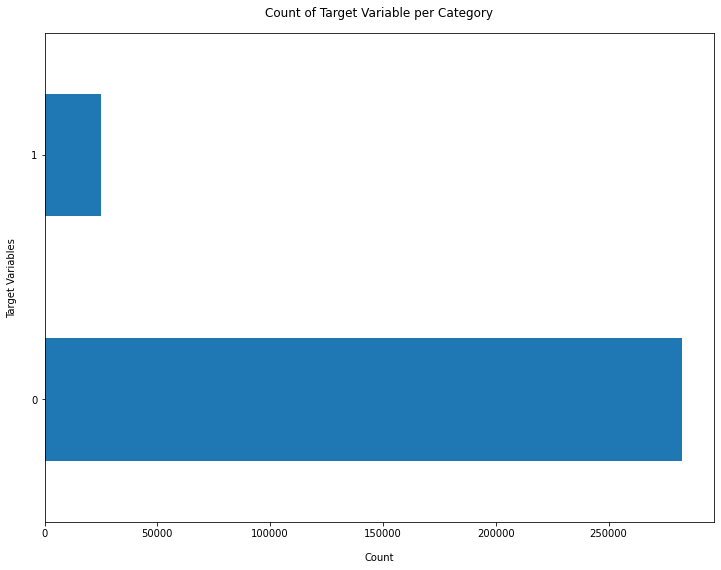

In [24]:
df_app['TARGET'].value_counts().plot(kind='barh',figsize=(12,9))
plt.xlabel('Count',labelpad=14)
plt.ylabel('Target Variables',labelpad=14)
plt.title('Count of Target Variable per Category',y=1.02)

In [25]:
print(f'Unique values in:\n{df_app["TARGET"].unique()}')
print(f'Total percentage of 1s and 0s:\n{df_app["TARGET"].value_counts()/len(df_app["TARGET"])}')

Unique values in:
[1 0]
Total percentage of 1s and 0s:
0    0.919271
1    0.080729
Name: TARGET, dtype: float64


In [26]:
empty_col=df_app.isnull().sum()

In [27]:
print(empty_col.values)


[     0      0      0      0      0      0      0      0      0     12
    278   1292      0      0      0      0      0      0      0      0
      0 202929      0      0      0      0      0      0  96391      2
      0      0      0      0      0      0      0      0      0      0
      0 173378    660  60965 156061 179943 150007 204488 214865 163891
 154828 153020 208642 182590 210199 154350 213514 169682 156061 179943
 150007 204488 214865 163891 154828 153020 208642 182590 210199 154350
 213514 169682 156061 179943 150007 204488 214865 163891 154828 153020
 208642 182590 210199 154350 213514 169682 210295 154297 148431 156341
 145755   1021   1021   1021   1021      1      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0  41519  41519  41519  41519
  41519  41519]


In [28]:
empty_col=empty_col[empty_col.values>(0.3*len(empty_col))]

In [29]:
empty_col

AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
EXT_SOURCE_1                  173378
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 64, dtype: int64

In [30]:
empty_col_df=pd.DataFrame(empty_col)
empty_col_df

,0
AMT_GOODS_PRICE,278
NAME_TYPE_SUITE,1292
OWN_CAR_AGE,202929
OCCUPATION_TYPE,96391
EXT_SOURCE_1,173378
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [31]:
empty_col_df=empty_col_df.reset_index()
empty_col_df=empty_col_df.rename(columns={'index':'Row',0:'sumCount'})
empty_col_df.head()

,Row,sumCount
0,AMT_GOODS_PRICE,278
1,NAME_TYPE_SUITE,1292
2,OWN_CAR_AGE,202929
3,OCCUPATION_TYPE,96391
4,EXT_SOURCE_1,173378


In [32]:
desc_app=desc.loc[desc['Table']=='application_data']

In [33]:
desc_app

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
117,120,application_data,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the...,NaN
118,121,application_data,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the...,NaN
119,122,application_data,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...,NaN
120,123,application_data,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...,NaN


In [34]:
desc.shape

(160, 5)

In [35]:
analyze_emptycol=pd.merge(
    left=empty_col_df,
    right=desc_app,
    how='inner',
    on='Row'
)
analyze_emptycol[['Row','Description']]

,Row,Description
0,AMT_GOODS_PRICE,For consumer loans it is the price of the good...
1,NAME_TYPE_SUITE,Who was accompanying client when he was applyi...
2,OWN_CAR_AGE,Age of client's car
3,OCCUPATION_TYPE,What kind of occupation does the client have
4,EXT_SOURCE_1,Normalized score from external data source
...,...,...
59,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the...
60,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the...
61,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...
62,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...


In [36]:
missing=pd.DataFrame((df_app.isnull().sum())*100/df_app.shape[0]).reset_index()


In [37]:
missing

,index,0
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
118,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
119,AMT_REQ_CREDIT_BUREAU_MON,13.501631
120,AMT_REQ_CREDIT_BUREAU_QRT,13.501631


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


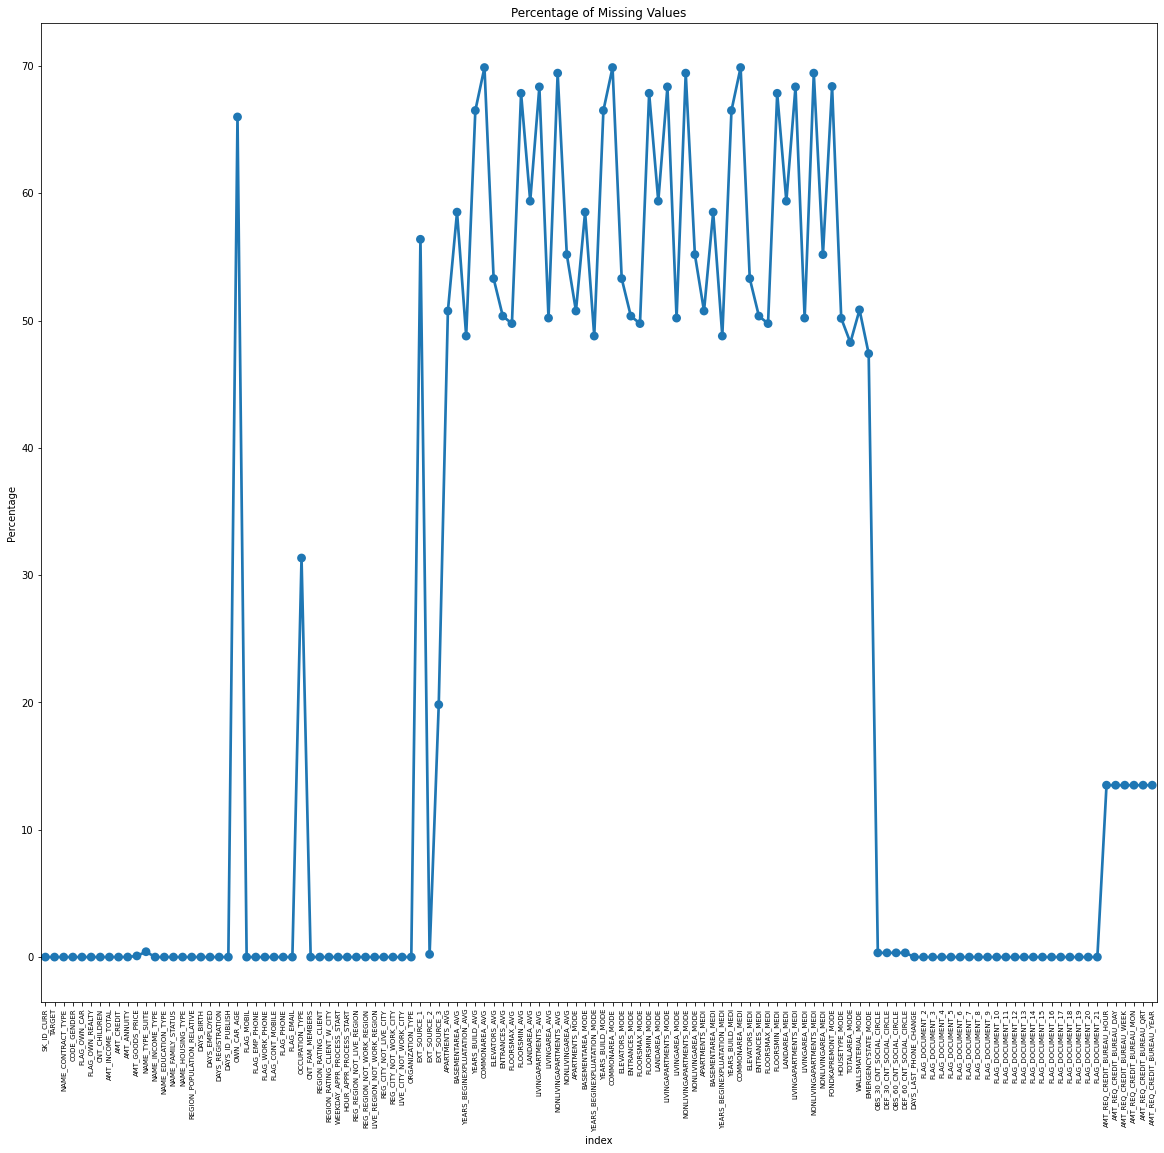

In [38]:
plt.figure(figsize=(20,18))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title('Percentage of Missing Values')
plt.ylabel('Percentage')
plt.show()

In [39]:
emptycol_l=list(empty_col[empty_col.values>=0.3].index)

In [40]:
emptycol_l

['AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPAR

In [41]:
emptycol_l.remove('AMT_GOODS_PRICE')
emptycol_l.remove('OWN_CAR_AGE')
emptycol_l.remove('OCCUPATION_TYPE')

In [42]:
len(emptycol_l)

61

In [43]:
df_app.drop(labels=emptycol_l,axis=1,inplace=True)
print(len(emptycol_l))

61


In [44]:
df_app.shape

(307511, 61)

In [45]:
df_app.isnull().sum()/len(df_app)*100

SK_ID_CURR            0.0
TARGET                0.0
NAME_CONTRACT_TYPE    0.0
CODE_GENDER           0.0
FLAG_OWN_CAR          0.0
                     ... 
FLAG_DOCUMENT_17      0.0
FLAG_DOCUMENT_18      0.0
FLAG_DOCUMENT_19      0.0
FLAG_DOCUMENT_20      0.0
FLAG_DOCUMENT_21      0.0
Length: 61, dtype: float64

In [46]:
values=df_app['AMT_ANNUITY'].median()
df_app.loc[df_app['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [47]:
df_app.loc[df_app['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']

Series([], Name: AMT_ANNUITY, dtype: float64)

In [48]:
df_app.isnull().sum()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
                     ..
FLAG_DOCUMENT_17      0
FLAG_DOCUMENT_18      0
FLAG_DOCUMENT_19      0
FLAG_DOCUMENT_20      0
FLAG_DOCUMENT_21      0
Length: 61, dtype: int64

In [49]:
emptyrow=df_app.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(df_app)].index)
df_app.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))

0


In [50]:
emptyrow

[]

In [51]:
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_app.drop(labels=unwanted,axis=1,inplace=True)

In [52]:
df_app[df_app['CODE_GENDER']=='XNA'].shape

(4, 31)

In [53]:
df_app[df_app['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 31)

In [54]:
df_app['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [55]:
df_app['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [56]:
df_app.loc[df_app['CODE_GENDER']=='XNA','CODE_GENDER']='F'

In [57]:
df_app['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [58]:
df_app=df_app.drop(df_app.loc[df_app['ORGANIZATION_TYPE']=='XNA'].index)
df_app[df_app['ORGANIZATION_TYPE']=='XNA'].shape

(0, 31)

In [59]:
df_app.loc[df_app['ORGANIZATION_TYPE']=='XNA'].index

Int64Index([], dtype='int64')

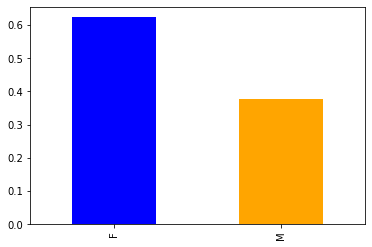

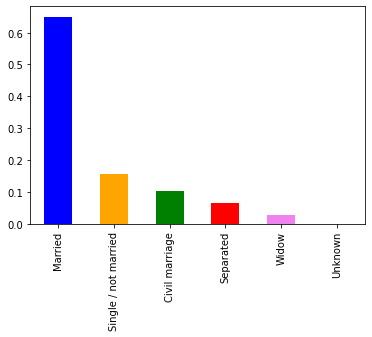

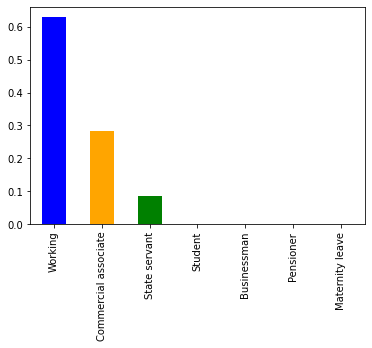

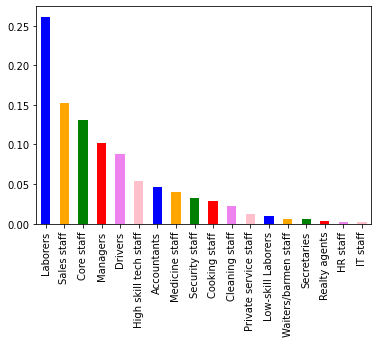

In [60]:
color=['blue','orange','green', 'red', 'violet', 'pink']

df_app.CODE_GENDER.value_counts(normalize=True).plot.bar(color=color)
plt.show()
df_app.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar(color=color)
plt.show()
df_app.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar(color=color)
plt.show()
df_app.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar(color=color)
plt.show()

In [61]:
def plot_features(feature,label_rotation=False,horizontal_layout=True):
  temp=df_app[feature].value_counts()
  df1=pd.DataFrame({feature:temp.index,'absolute_val':temp.values})

  t1_percentage=df_app[[feature,'TARGET']].groupby([feature],as_index=False).mean()
  t1_percentage.sort_values(by='TARGET',ascending=False,inplace=True)

  if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
  else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
  s = sns.barplot(ax=ax1, x = feature, y="absolute_val",data=df1)
  if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
  s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=t1_percentage[feature], data=t1_percentage)
  if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
  plt.ylabel('% of applications where loans were NOT repayed', fontsize=10)
  plt.tick_params(axis='both', which='major', labelsize=10)
  plt.subplots_adjust(wspace = .6)

  plt.show();



In [62]:
cat_data=df_app.select_dtypes(include=object).columns
cat_data

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

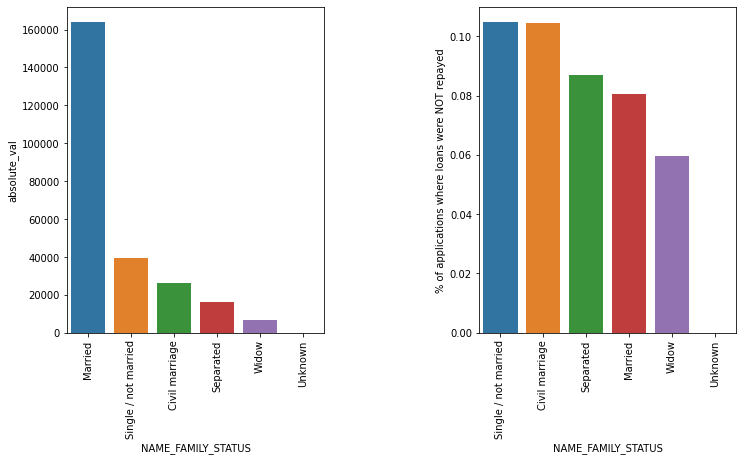

In [63]:
plot_features('NAME_FAMILY_STATUS',True,True)

In [64]:
df_app['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
State servant            21703
Student                     18
Businessman                 10
Pensioner                   10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

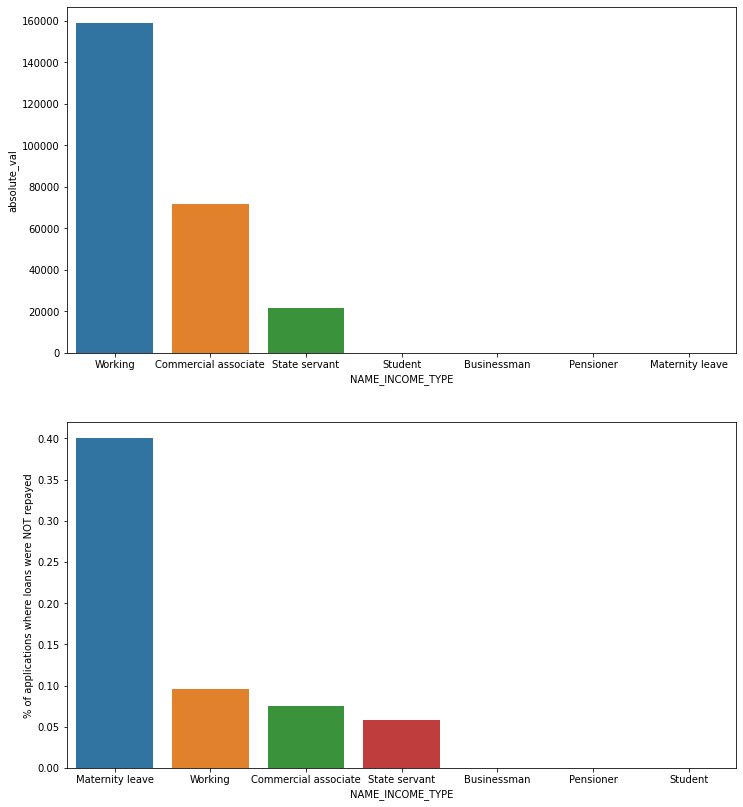

In [65]:
plot_features('NAME_INCOME_TYPE',False,False)

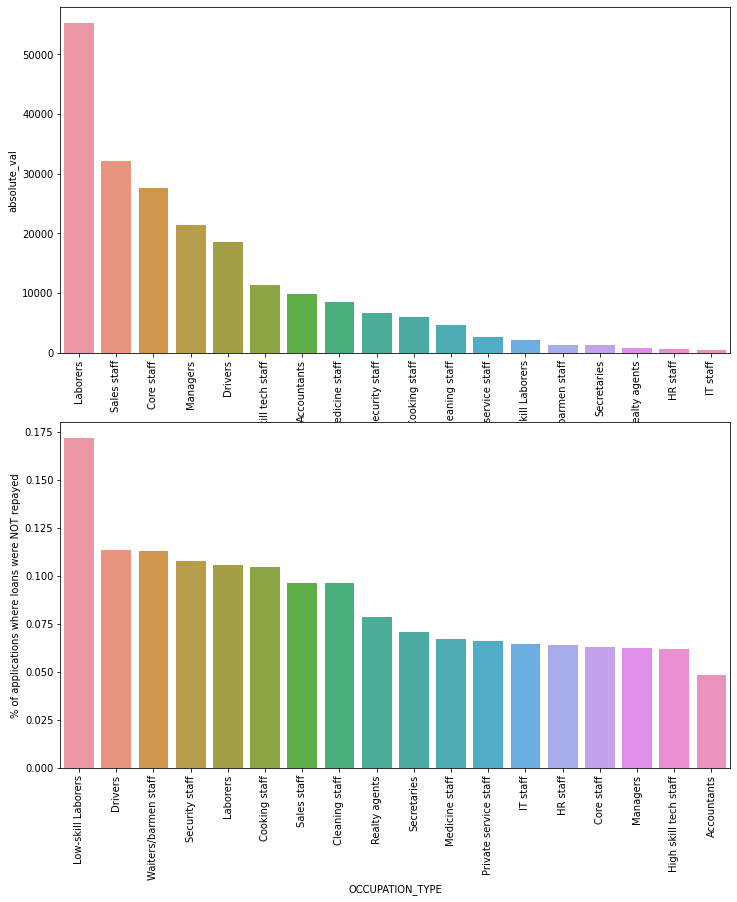

In [66]:
plot_features('OCCUPATION_TYPE',True, False)

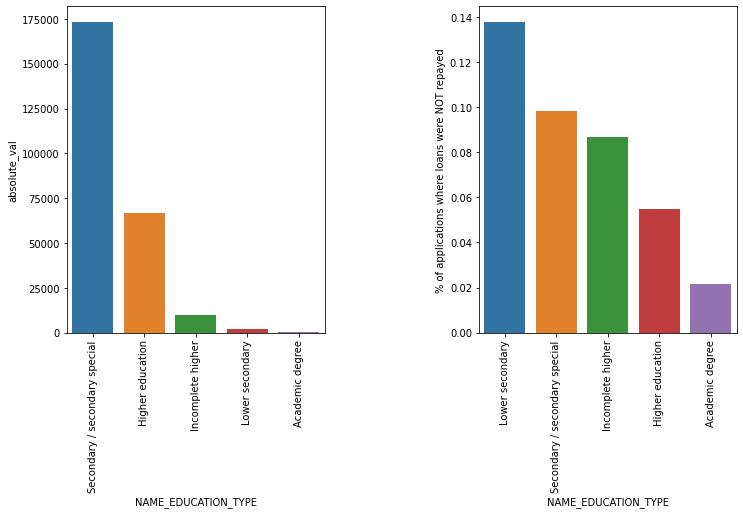

In [67]:
plot_features('NAME_EDUCATION_TYPE',True,True)

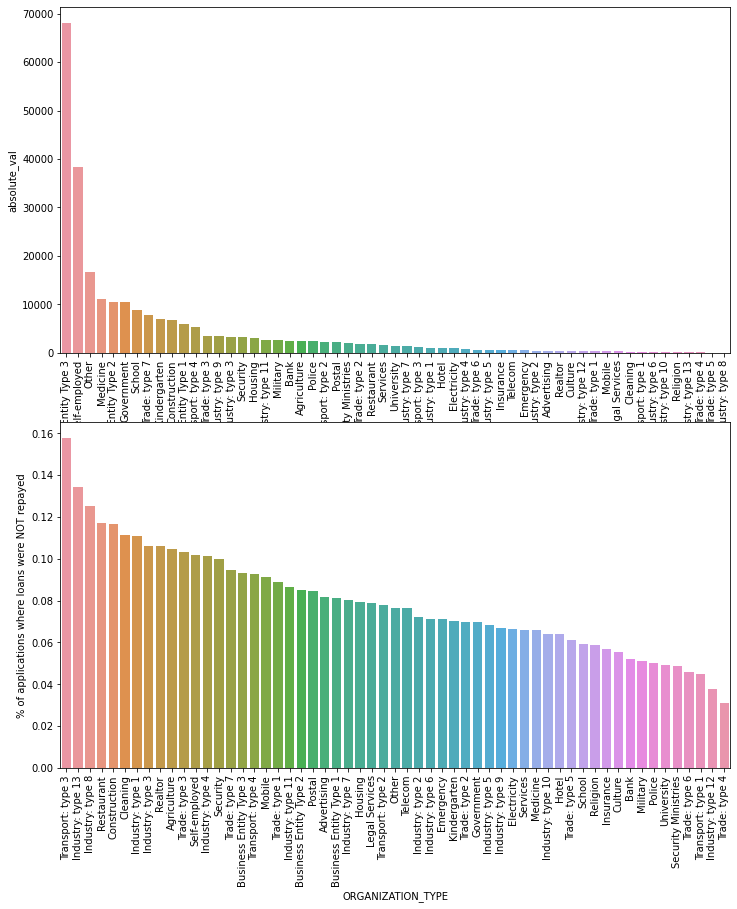

In [68]:
plot_features('ORGANIZATION_TYPE',True, False)

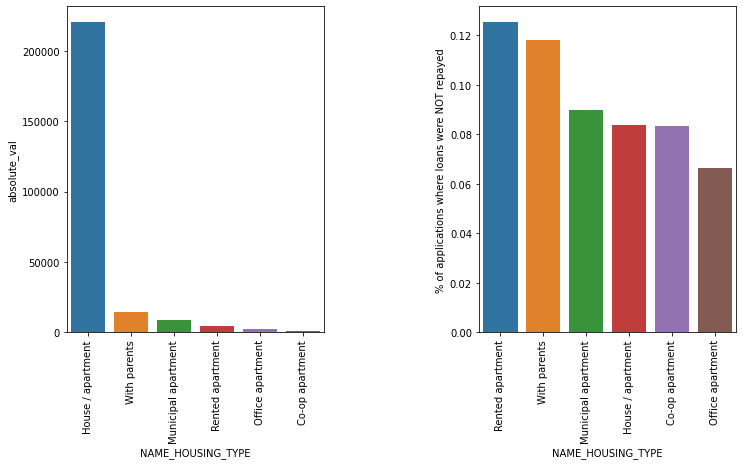

In [69]:
plot_features('NAME_HOUSING_TYPE',True)

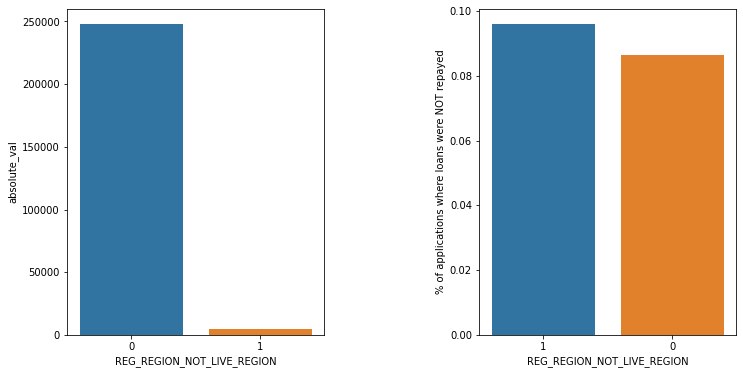

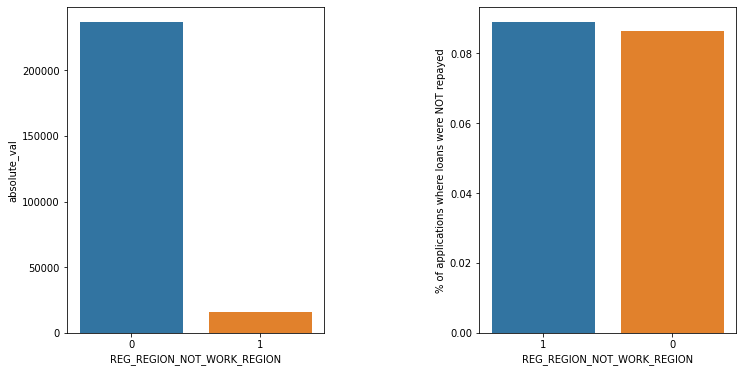

In [70]:
plot_features('REG_REGION_NOT_LIVE_REGION')
plot_features('REG_REGION_NOT_WORK_REGION')

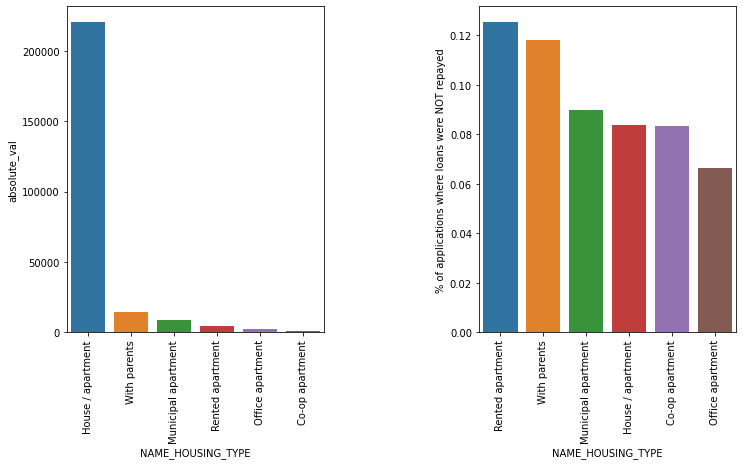

In [71]:
plot_features('NAME_HOUSING_TYPE',True)

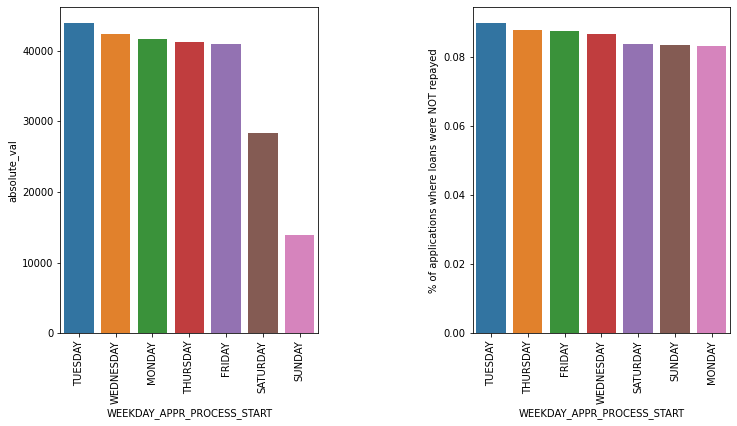

In [72]:
plot_features('WEEKDAY_APPR_PROCESS_START', True)

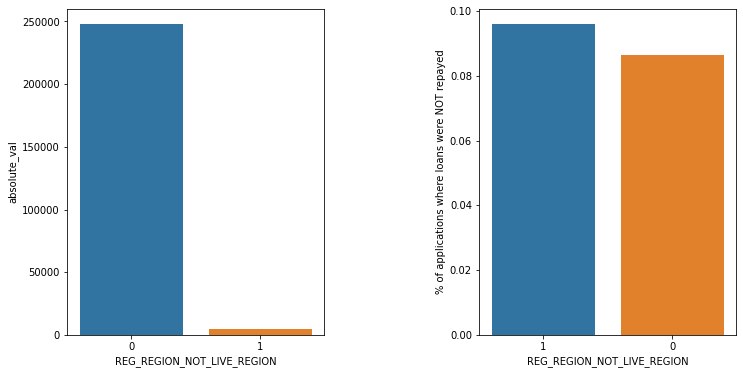

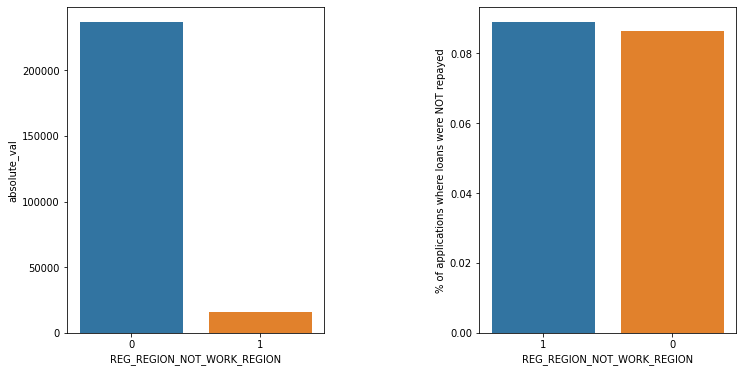

In [73]:
plot_features('REG_REGION_NOT_LIVE_REGION')
plot_features('REG_REGION_NOT_WORK_REGION')

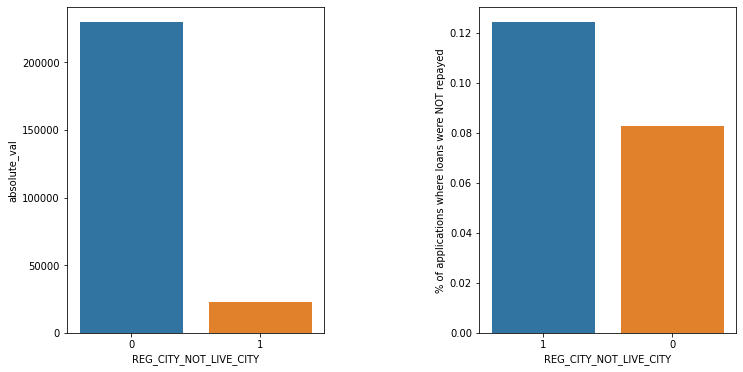

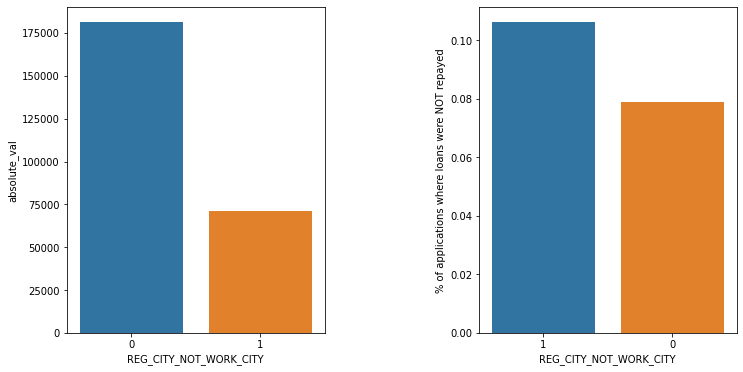

In [74]:
plot_features('REG_CITY_NOT_LIVE_CITY')
plot_features('REG_CITY_NOT_WORK_CITY')

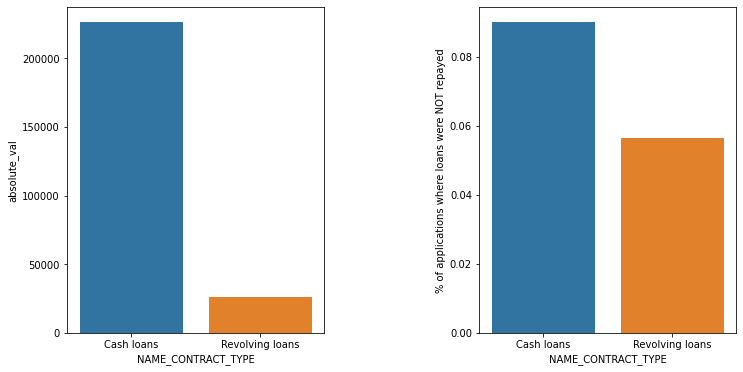

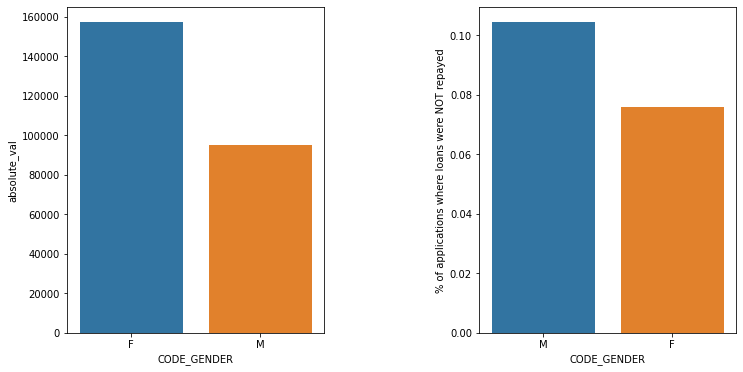

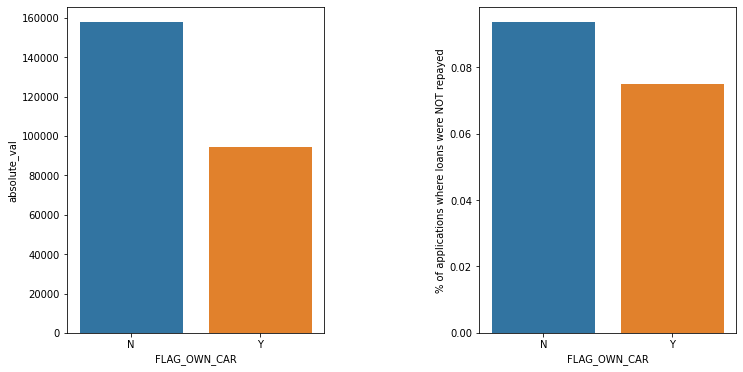

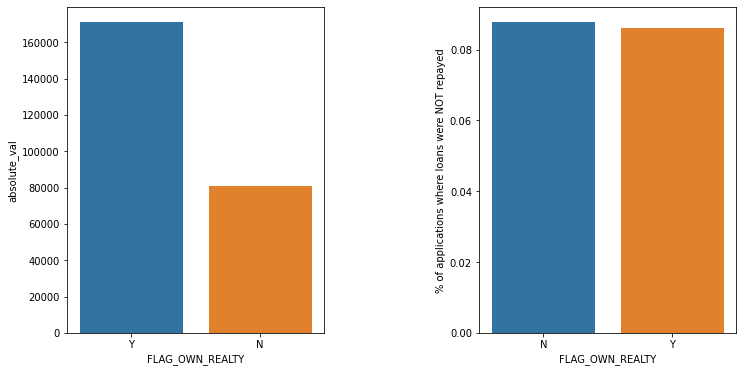

In [75]:
for feature in cat_data[:4]:
    plot_features(feature)

In [76]:
numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df_app[numeric_columns]=df_app[numeric_columns].apply(pd.to_numeric)
df_app.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,Core staff,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,Laborers,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion


In [77]:
df_app['AMT_INCOME_TOTAL']

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307504    153000.0
307506    157500.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 252137, dtype: float64

In [78]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df_app['AMT_INCOME_RANGE']=pd.cut(df_app['AMT_INCOME_TOTAL'],bins,labels=slot)
df_app.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,200000-225000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,Core staff,MONDAY,11,0,0,0,0,0,0,School,250000-275000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,Laborers,MONDAY,9,0,0,0,0,0,0,Government,50000-75000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,125000-150000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,100000-125000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,NaN,Laborers,WEDNESDAY,16,0,0,0,0,0,0,Other,"75000,100000"
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,17.0,Accountants,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,150000-175000
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,8.0,Managers,MONDAY,16,0,0,0,0,1,1,Other,350000-375000
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,NaN,Laborers,THURSDAY,8,0,0,0,0,0,0,Electricity,125000-150000
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,652500.0,Working,Higher education,Married,House / apartment,0.022800,-10197,-679,-4427.0,-738,NaN,Core staff,SATURDAY,15,0,0,0,0,0,0,Medicine,100000-125000


In [79]:
df_app['AMT_INCOME_RANGE']

0         200000-225000
1         250000-275000
2           50000-75000
3         125000-150000
4         100000-125000
              ...      
307504    150000-175000
307506    150000-175000
307508    150000-175000
307509    150000-175000
307510    150000-175000
Name: AMT_INCOME_RANGE, Length: 252137, dtype: category
Categories (21, object): ['0-25000' < '25000-50000' < '50000-75000' < '75000,100000' < ... <
                          '425000-450000' < '450000-475000' < '475000-500000' < '500000 and above']

In [80]:
target_0=df_app.loc[df_app['TARGET']==0]
target_1=df_app.loc[df_app['TARGET']==1]

In [81]:
target_0.shape,target_1.shape

((230302, 32), (21835, 32))

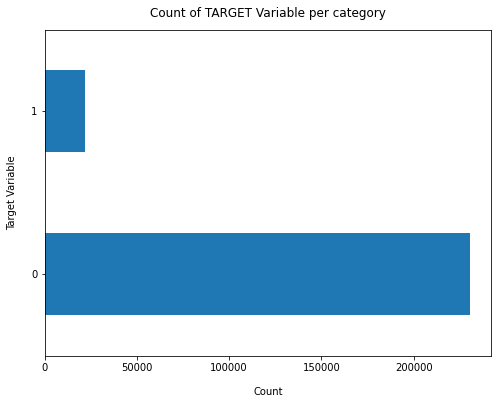

In [82]:
df_app['TARGET'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [83]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

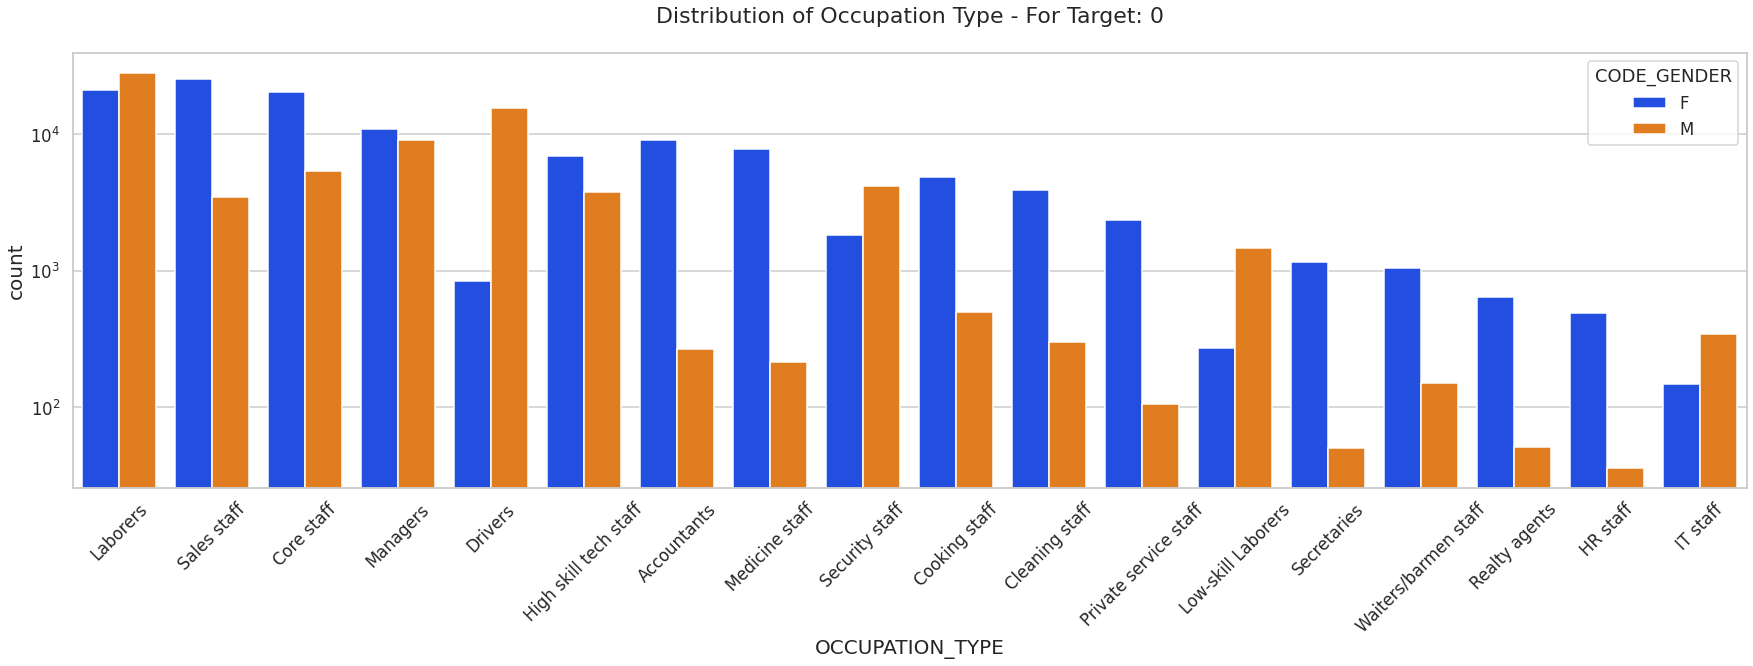

In [84]:
uniplot(target_0,col='OCCUPATION_TYPE',title='Distribution of Occupation Type - For Target: 0',hue='CODE_GENDER')

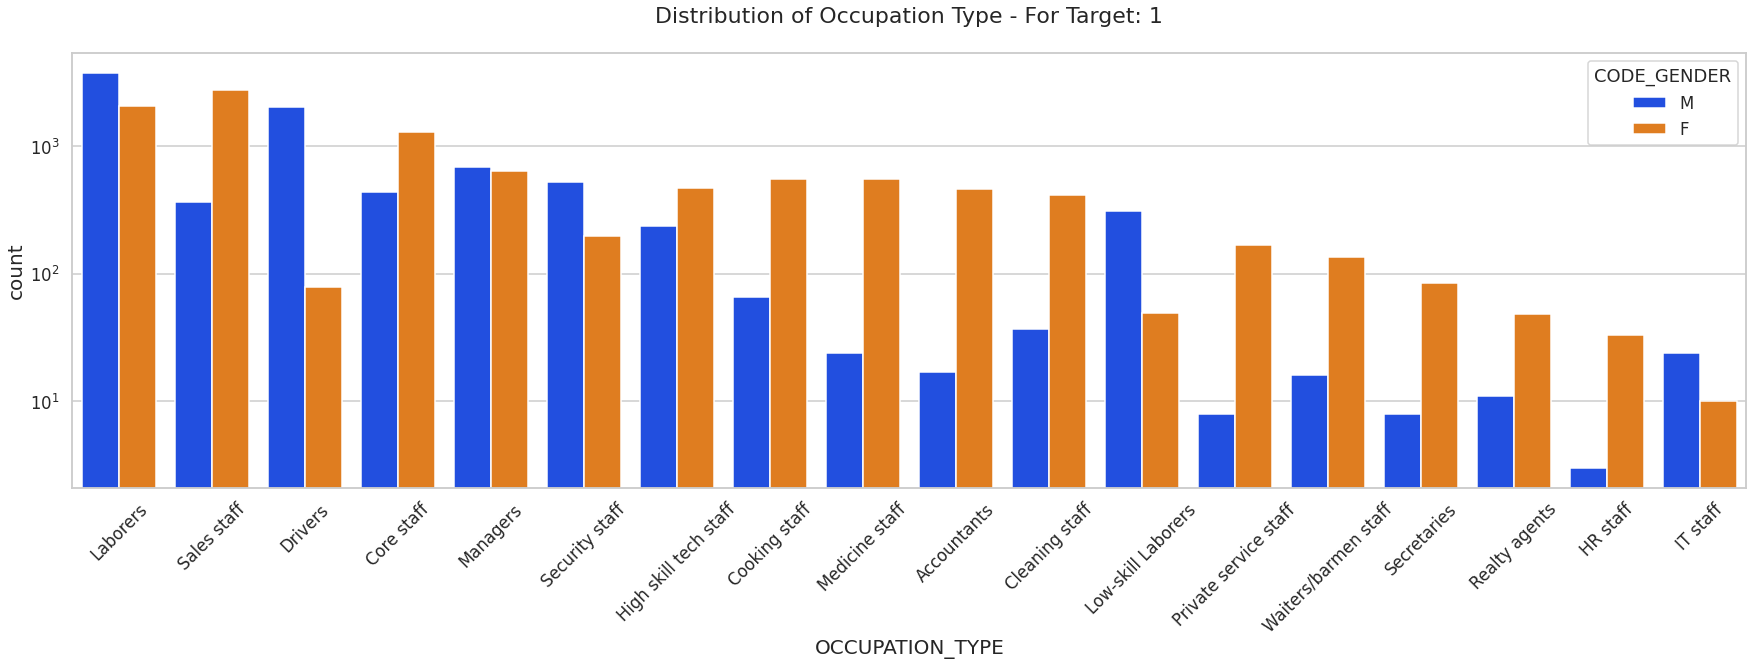

In [85]:
uniplot(target_1,col='OCCUPATION_TYPE',title='Distribution of Occupation Type - For Target: 1',hue='CODE_GENDER')

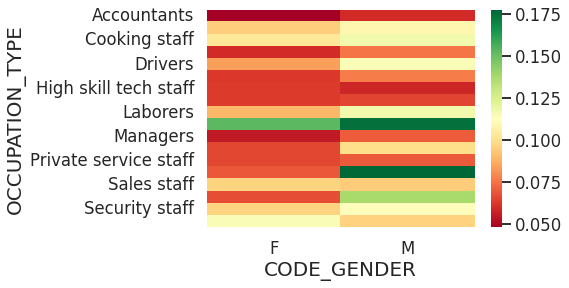

In [86]:
res = pd.pivot_table(data=df_app, index='OCCUPATION_TYPE', columns='CODE_GENDER', values='TARGET')
sns.heatmap(res, annot=False, cmap="RdYlGn")

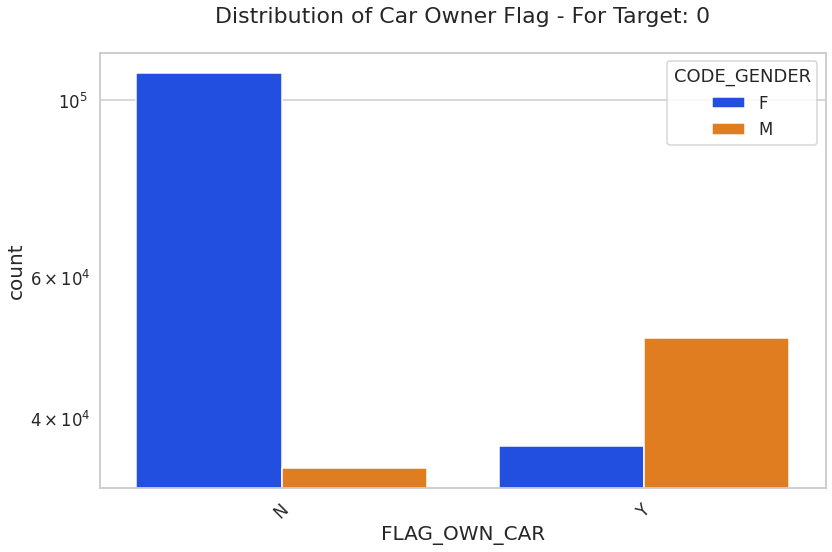

In [87]:
uniplot(target_0,col='FLAG_OWN_CAR',title='Distribution of Car Owner Flag - For Target: 0',hue='CODE_GENDER')

In [88]:
res = pd.pivot_table(data=df_app, index='FLAG_OWN_CAR', columns='CODE_GENDER', values='TARGET')


In [89]:
res

CODE_GENDER,F,M
FLAG_OWN_CAR,,
N,0.080951,0.130750
Y,0.060536,0.085339


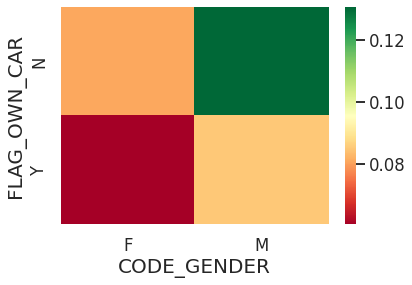

In [90]:
sns.heatmap(res, annot=False, cmap="RdYlGn")

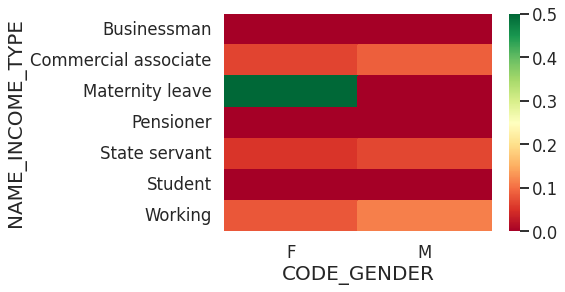

In [91]:
res = pd.pivot_table(data=df_app, index='NAME_INCOME_TYPE', columns='CODE_GENDER', values='TARGET')
sns.heatmap(res, annot=False, cmap="RdYlGn")

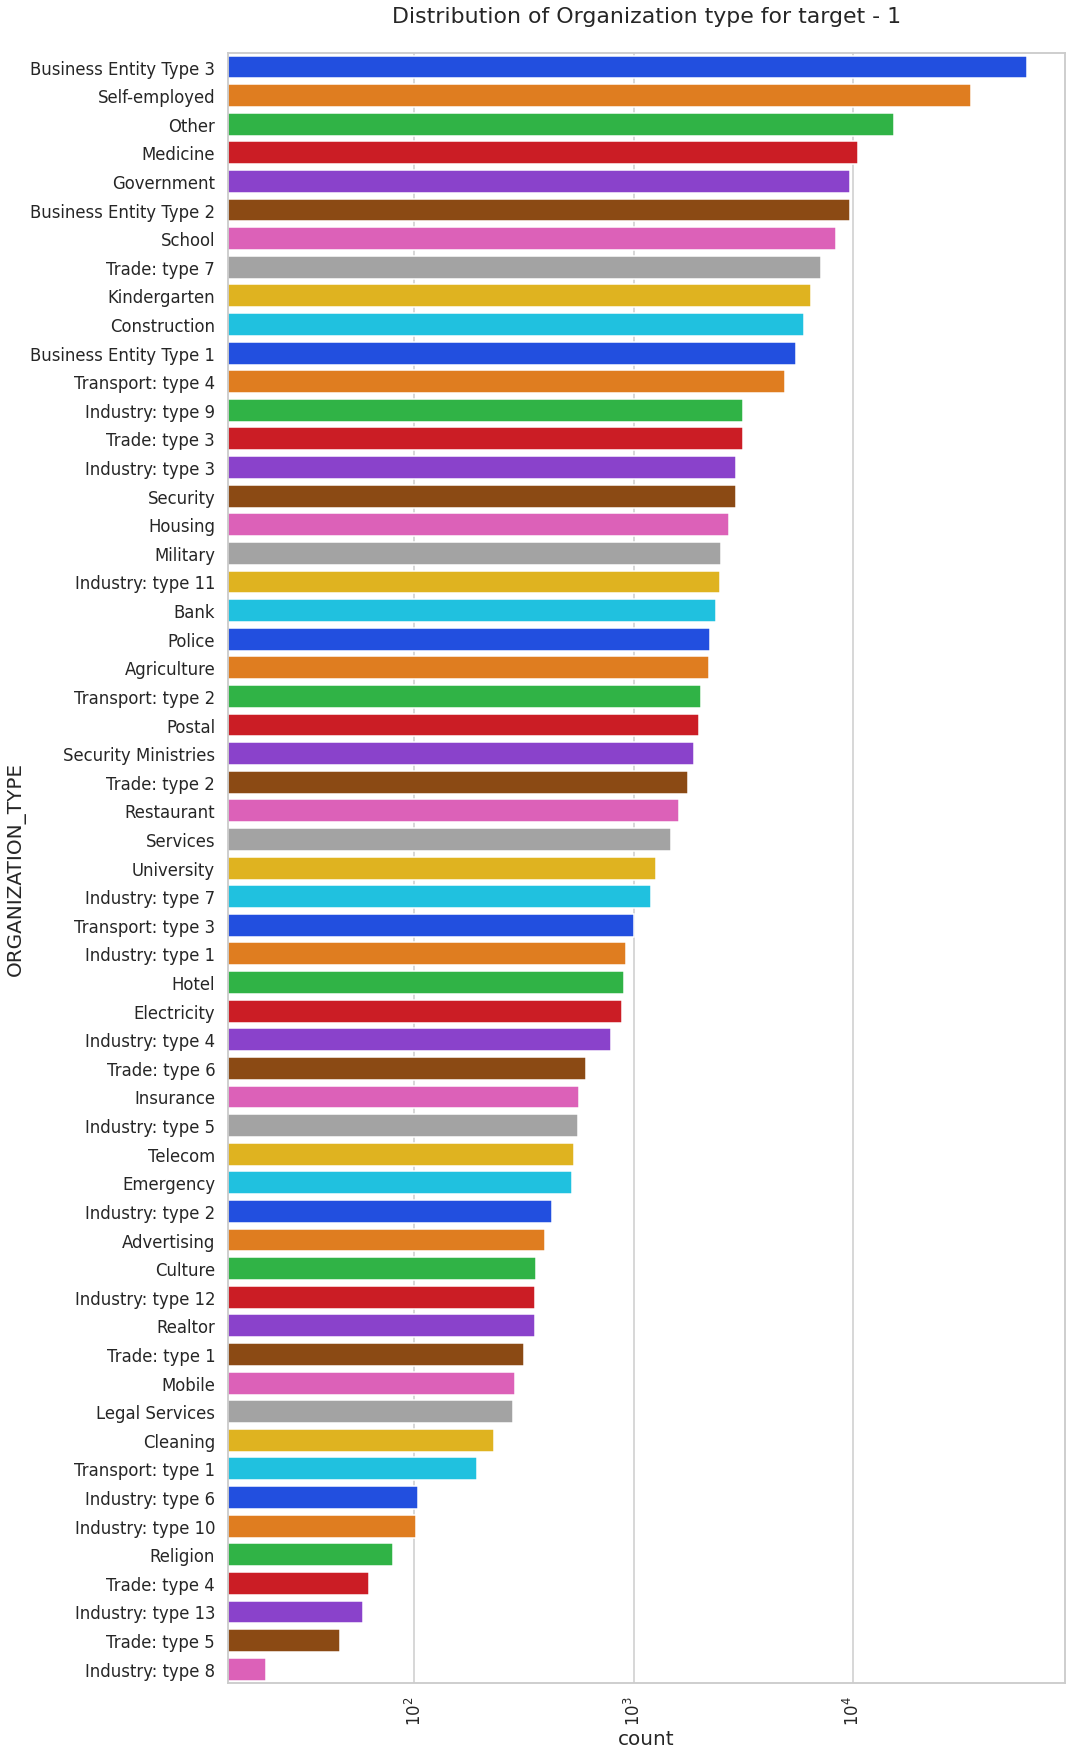

In [92]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams['axes.labelsize']=20
plt.rcParams['axes.titlesize']=22
plt.rcParams['axes.titlepad']=30

plt.title('Distribution of Organization type for target - 1')

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target_0,y='ORGANIZATION_TYPE',order=target_0['ORGANIZATION_TYPE'].value_counts().index,palette='bright')
plt.show()

In [93]:
target_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,200000-225000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,NaN,Cooking staff,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,100000-125000
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,NaN,Laborers,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,200000-225000
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,NaN,Sales staff,THURSDAY,11,0,0,0,0,0,0,Self-employed,125000-150000
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,-10199,-2015,-4802.0,-1038,2.0,NaN,SUNDAY,13,0,0,0,0,1,1,Industry: type 4,300000-325000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,450000.0,Working,Secondary / secondary special,Married,House / apartment,0.020246,-9918,-3048,-8507.0,-2580,NaN,Laborers,MONDAY,16,0,0,0,0,0,0,Business Entity Type 3,200000-225000
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,1125000.0,Working,Higher education,Civil marriage,House / apartment,0.007330,-13416,-2405,-500.0,-4704,NaN,Laborers,THURSDAY,13,0,0,0,0,0,0,Construction,125000-150000
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,297000.0,Working,Secondary / secondary special,Married,House / apartment,0.008575,-20644,-3147,-8921.0,-3832,NaN,Managers,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,200000-225000
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,450000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.014464,-16471,-286,-8291.0,-9,NaN,Sales staff,FRIDAY,5,0,0,0,0,0,0,Business Entity Type 3,200000-225000


In [94]:
numer= df_app.describe()
numerical= numer.columns
numer

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
count,252137.000000,252137.000000,252137.000000,2.521370e+05,2.521370e+05,252137.000000,2.518810e+05,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,94413.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000
mean,278114.643103,0.086600,0.498515,1.759141e+05,6.113985e+05,27812.186704,5.494057e+05,0.020894,-14769.133174,-2384.169325,-4635.430849,-2800.639724,11.950187,12.203302,0.017241,0.061919,0.049588,0.089769,0.281065,0.218988
std,102815.635309,0.281248,0.763161,2.588516e+05,4.065272e+05,14647.424282,3.732685e+05,0.013874,3662.573769,2338.360162,3252.169156,1515.360629,11.981952,3.299799,0.130167,0.241008,0.217093,0.285851,0.449520,0.413561
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000290,-25200.000000,-17912.000000,-22928.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189035.000000,0.000000,0.000000,1.125000e+05,2.779695e+05,17073.000000,2.475000e+05,0.010006,-17563.000000,-3175.000000,-6952.000000,-4177.000000,5.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278064.000000,0.000000,0.000000,1.575000e+05,5.212800e+05,25834.500000,4.500000e+05,0.018850,-14573.000000,-1648.000000,-4265.000000,-2886.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367165.000000,0.000000,1.000000,2.115000e+05,8.292240e+05,35617.500000,6.930000e+05,0.028663,-11775.000000,-767.000000,-1845.000000,-1487.000000,15.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,0.000000,0.000000,0.000000,91.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
numer.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY'],
      dtype='object')

In [96]:
(df_app['DAYS_BIRTH']/-365).describe()

count    252137.000000
mean         40.463379
std          10.034449
min          20.517808
25%          32.260274
50%          39.926027
75%          48.117808
max          69.041096
Name: DAYS_BIRTH, dtype: float64

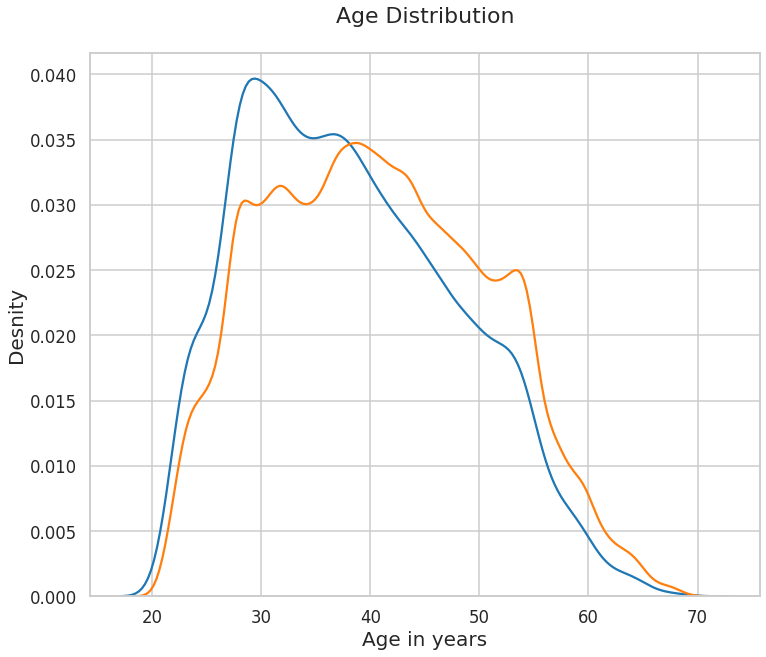

In [97]:
plt.figure(figsize=(12,10))

sns.kdeplot(df_app.loc[df_app['TARGET']==1,'DAYS_BIRTH'] / -365,label='Loan repayed(0)')
sns.kdeplot(df_app.loc[df_app['TARGET']==0,'DAYS_BIRTH'] / -365,label='Loan not repayed(1)')
plt.xlabel('Age in years')
plt.ylabel('Desnity')
plt.title('Age Distribution');

In [98]:
df_app['DAYS_BIRTH'] = abs(df_app['DAYS_BIRTH'])
df_app['DAYS_BIRTH'].corr(df_app['TARGET'])

-0.06575553861621566

In [99]:
age_data = df_app[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
age_data['AGE_RANGE'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))

age_data = age_data.groupby('AGE_RANGE').mean()
age_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TARGET,DAYS_BIRTH,YEARS_BIRTH
AGE_RANGE,,,
"(20.0, 25.0]",0.122722,8532.856990,23.377690
"(25.0, 30.0]",0.111447,10155.467216,27.823198
"(30.0, 35.0]",0.102594,11854.730811,32.478715
"(35.0, 40.0]",0.089336,13706.581141,37.552277
"(40.0, 45.0]",0.078174,15496.024578,42.454862
"(45.0, 50.0]",0.073991,17320.591576,47.453676
"(50.0, 55.0]",0.067840,19177.591819,52.541347
"(55.0, 60.0]",0.058527,20894.447645,57.245062
"(60.0, 65.0]",0.046597,22676.599575,62.127670


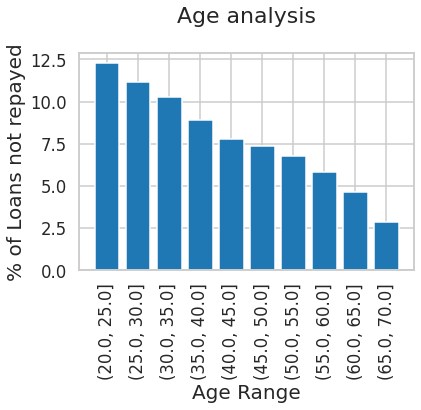

In [100]:
plt.bar(age_data.index.astype(str), 100 * age_data['TARGET'])

plt.xticks(rotation = 90); plt.xlabel('Age Range'); plt.ylabel('% of Loans not repayed')
plt.title('Age analysis');

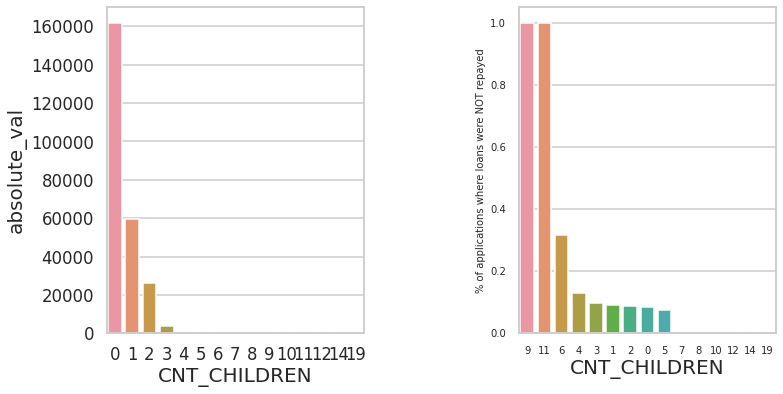

In [101]:
plot_features('CNT_CHILDREN')

In [102]:
def plot_numerical(feature):
    plt.figure(figsize=(10,6))
    plt.title("%s Distribution" % feature)
    sns.distplot(df_app[feature].dropna(), kde=True)
    plt.show() 

In [103]:
df_app_again = pd.read_csv('application_data.csv')

In [104]:
df_app['CNT_FAM_MEMBERS'] = df_app_again['CNT_FAM_MEMBERS']
df_app['EXT_SOURCE_1'] = df_app_again['EXT_SOURCE_1']
df_app['EXT_SOURCE_2'] = df_app_again['EXT_SOURCE_2']
df_app['EXT_SOURCE_3'] = df_app_again['EXT_SOURCE_3']
df_app['FLAG_EMP_PHONE'] = df_app_again['FLAG_EMP_PHONE']

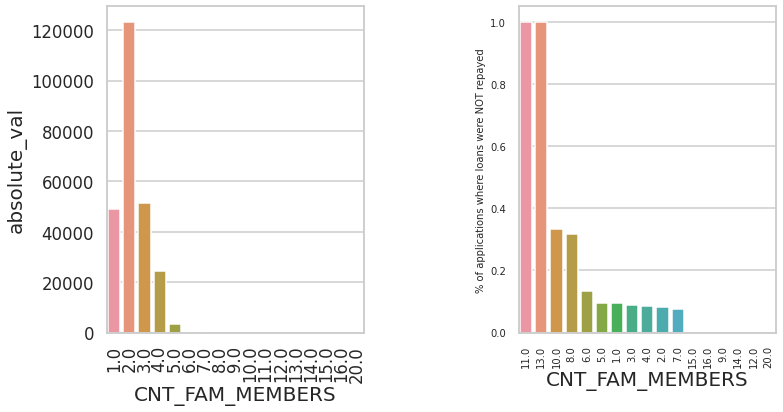

In [105]:
plot_features('CNT_FAM_MEMBERS',True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


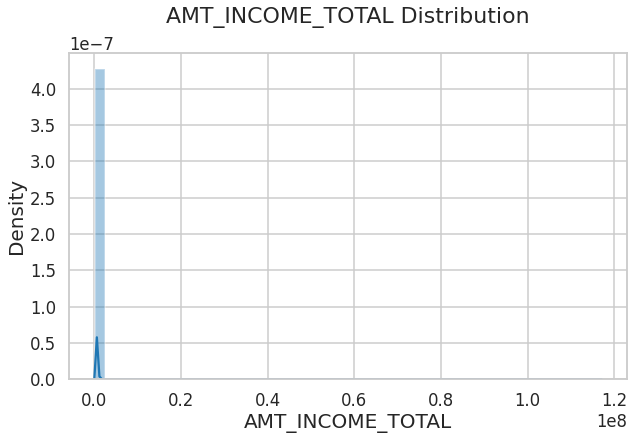

In [106]:
plot_numerical('AMT_INCOME_TOTAL')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


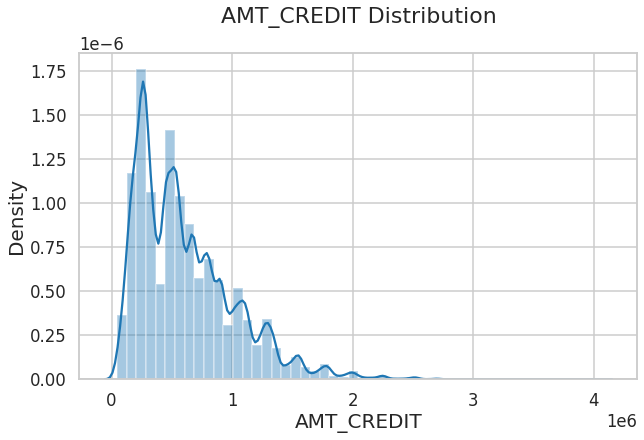

In [107]:
plot_numerical('AMT_CREDIT')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


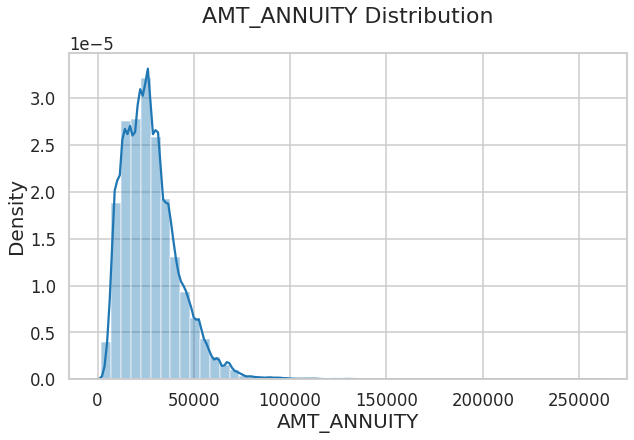

In [108]:
plot_numerical('AMT_ANNUITY')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


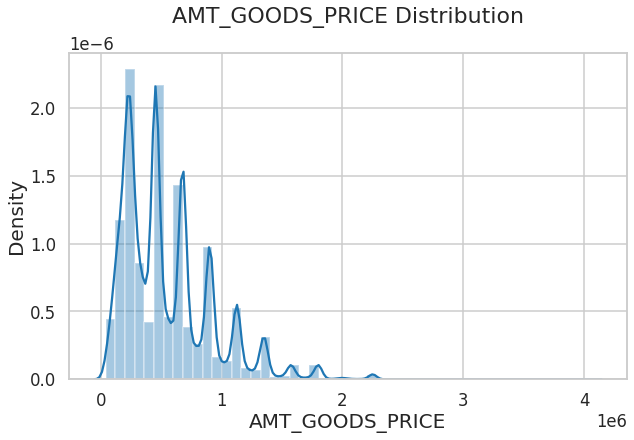

In [109]:
plot_numerical('AMT_GOODS_PRICE')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


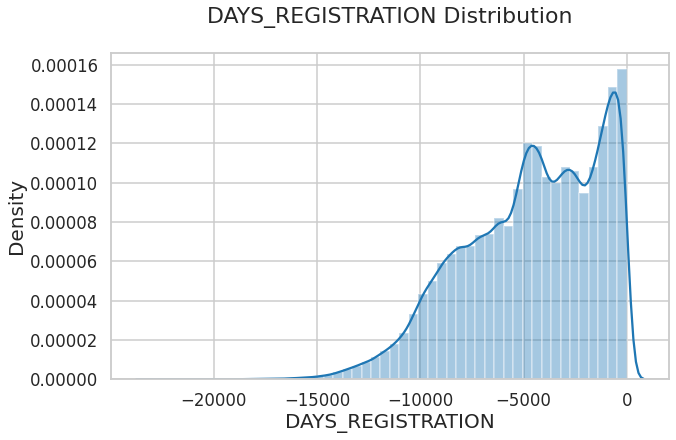

In [110]:
plot_numerical('DAYS_REGISTRATION')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


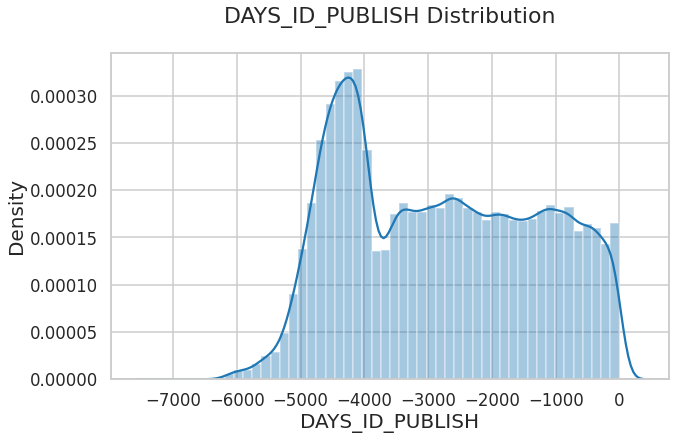

In [111]:
plot_numerical('DAYS_ID_PUBLISH')

In [112]:
def plot_comparisons(features):
  t_1=df_app.loc[df_app['TARGET']==1]
  t_0=df_app.loc[df_app['TARGET']==0]
  i=0
  for feature in features:
    plt.figure(figsize=(12,6))
    i+=1
    sns.kdeplot(t_0[feature],bw=0.5,label='Loans repayed')
    sns.kdeplot(t_1[feature],bw=0.5,label='Loans not repayed')
    plt.ylabel('Density')
    plt.xlabel(feature)
    _,labels=plt.xticks()
    plt.tick_params(axis='both',which='major',labelsize=12)
    plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


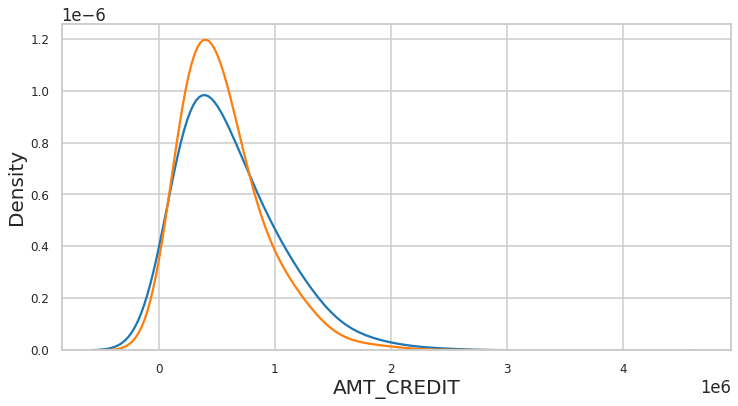

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


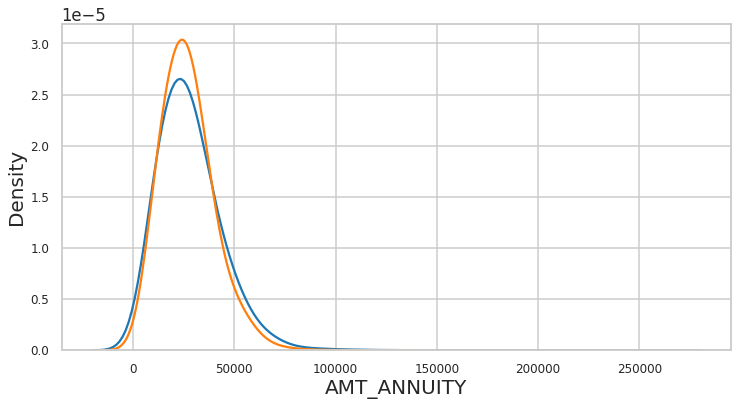

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


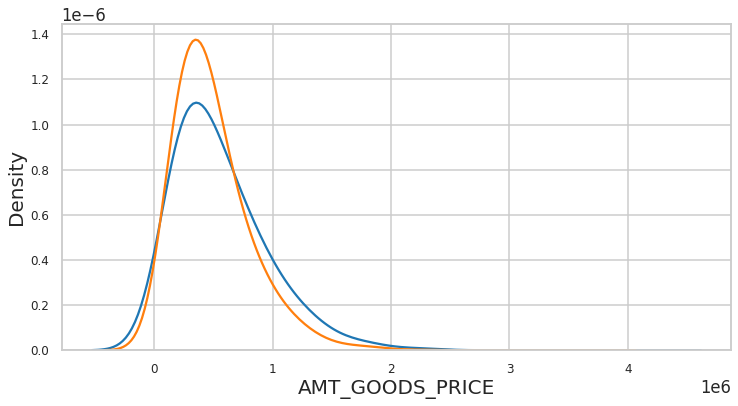

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


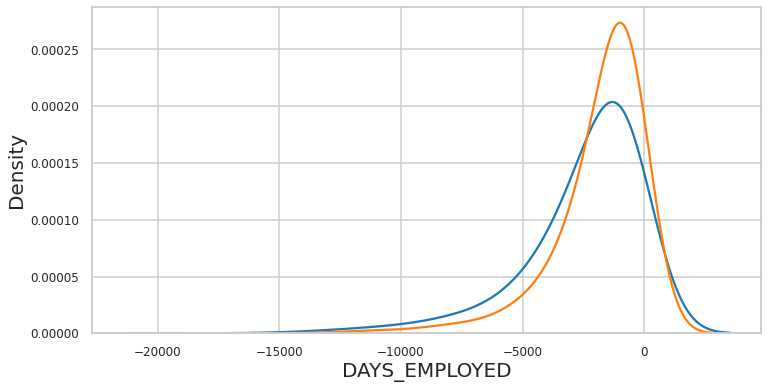

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


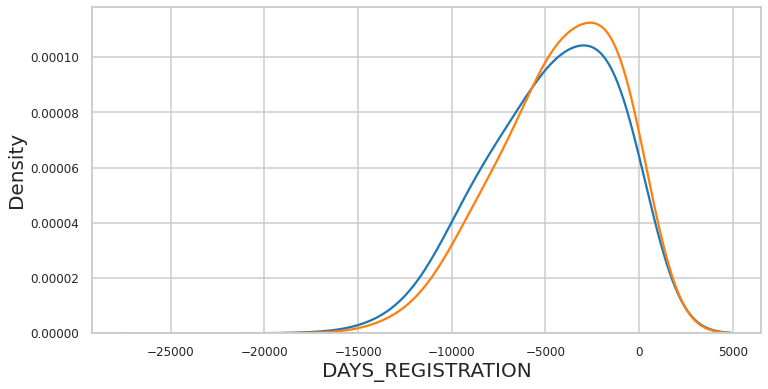

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


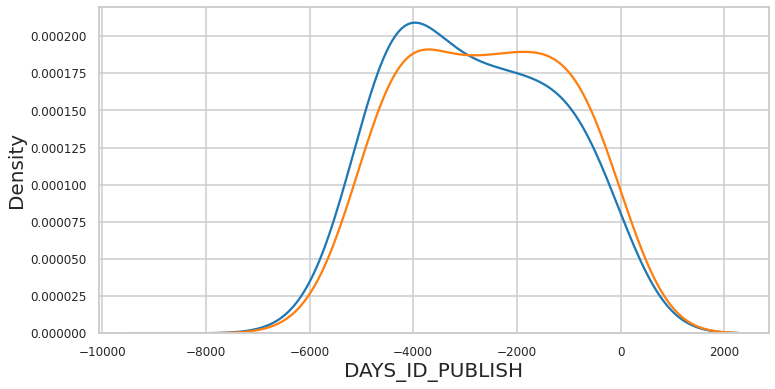

In [113]:
feat = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_ID_PUBLISH']
plot_comparisons(feat)

In [114]:
app_data_enc = pd.get_dummies(df_app, drop_first=True)

In [115]:
app_data_enc

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_EMP_PHONE,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,AMT_INCOME_RANGE_25000-50000,AMT_INCOME_RANGE_50000-75000,"AMT_INCOME_RANGE_75000,100000",AMT_INCOME_RANGE_100000-125000,AMT_INCOME_RANGE_125000-150000,AMT_INCOME_RANGE_150000-175000,AMT_INCOME_RANGE_175000-200000,AMT_INCOME_RANGE_200000-225000,AMT_INCOME_RANGE_225000-250000,AMT_INCOME_RANGE_250000-275000,AMT_INCOME_RANGE_275000-300000,AMT_INCOME

In [116]:
correlations = df_app.corr()['TARGET'].sort_values()
print('Top 10 Positive Correlations:\n', correlations.tail(10))
print('\nTop 10 Negative Correlations:\n', correlations.head(10))

Top 10 Positive Correlations:
 REG_REGION_NOT_LIVE_REGION    0.004393
CNT_CHILDREN                  0.007741
LIVE_CITY_NOT_WORK_CITY       0.024599
DAYS_REGISTRATION             0.036087
OWN_CAR_AGE                   0.039025
DAYS_ID_PUBLISH               0.039910
REG_CITY_NOT_LIVE_CITY        0.041977
REG_CITY_NOT_WORK_CITY        0.043384
DAYS_EMPLOYED                 0.074958
TARGET                        1.000000
Name: TARGET, dtype: float64

Top 10 Negative Correlations:
 EXT_SOURCE_3                 -0.179762
EXT_SOURCE_2                 -0.170531
EXT_SOURCE_1                 -0.155341
DAYS_BIRTH                   -0.065756
AMT_GOODS_PRICE              -0.050342
AMT_CREDIT                   -0.040659
REGION_POPULATION_RELATIVE   -0.040640
HOUR_APPR_PROCESS_START      -0.031099
AMT_ANNUITY                  -0.020037
AMT_INCOME_TOTAL             -0.007332
Name: TARGET, dtype: float64


Text(0.5, 1.0, 'Correlation for External Sources and Age')

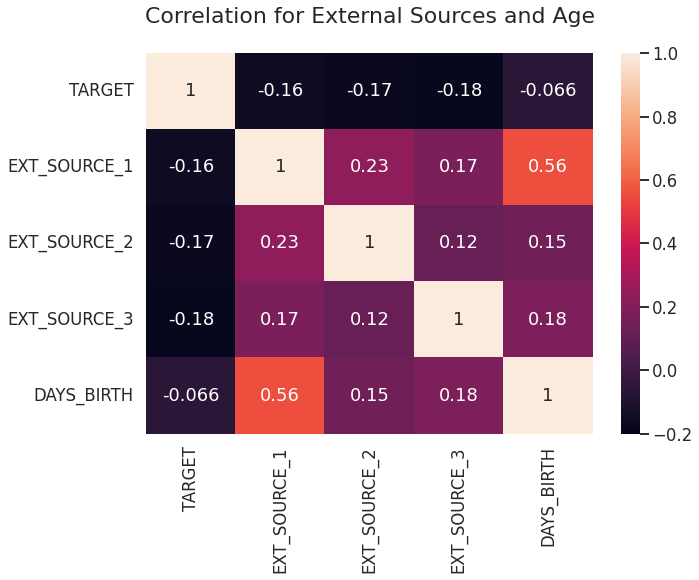

In [117]:
df_app['DAYS_BIRTH']
ext_sc=df_app[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
ext_sc_corrs=ext_sc.corr()

plt.figure(figsize=(10,7))
sns.heatmap(ext_sc_corrs,vmin=-0.2,annot=True)
plt.title('Correlation for External Sources and Age')

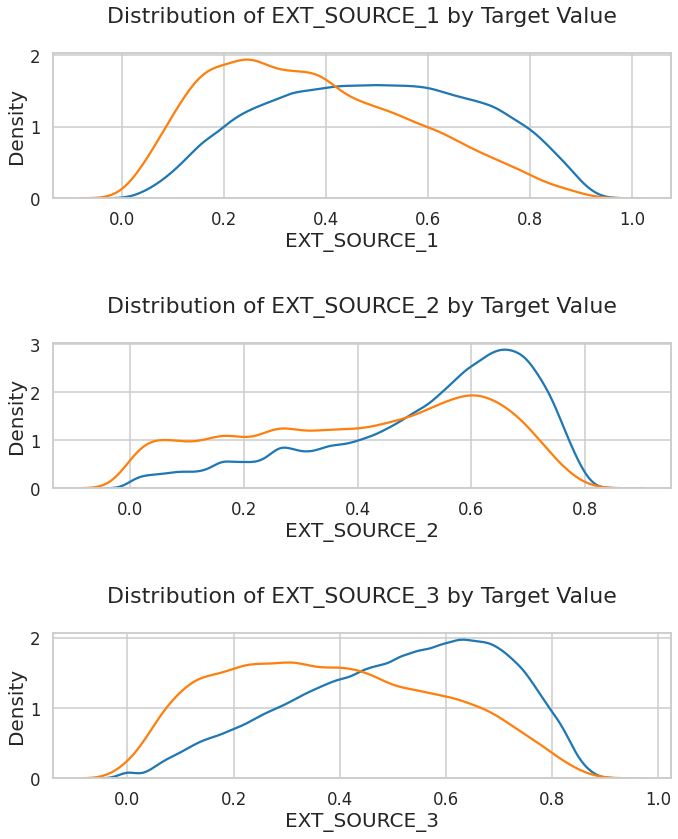

In [118]:
plt.figure(figsize=(10,12))
externals=['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']

for i,external in enumerate(externals):
  plt.subplot(3,1,i+1)
  sns.kdeplot(df_app.loc[df_app['TARGET']==0,external],label='target==0')
  sns.kdeplot(df_app.loc[df_app['TARGET']==1,external],label='target==1')
  plt.title('Distribution of %s by Target Value'% external)
  plt.xlabel('%s'%external); plt.ylabel('Density')
plt.tight_layout(h_pad=2.5)

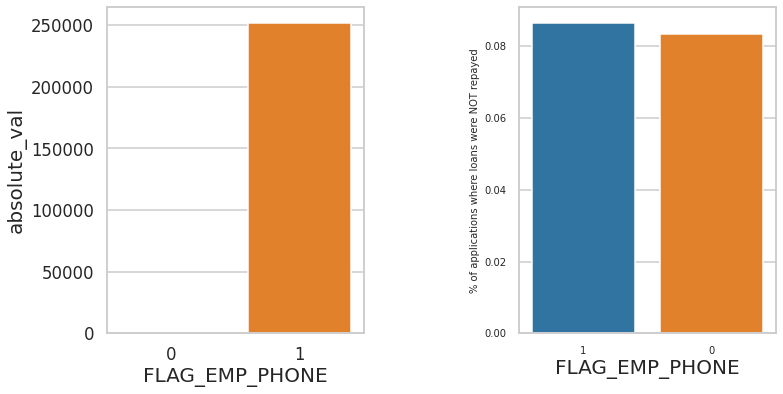

In [119]:
plot_features('FLAG_EMP_PHONE')

In [120]:
prev_data= pd.read_csv('previous_application.csv')
prev_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [121]:
len(set(prev_data['SK_ID_CURR']))

338857

In [122]:
len(prev_data['SK_ID_CURR'])

1670214

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


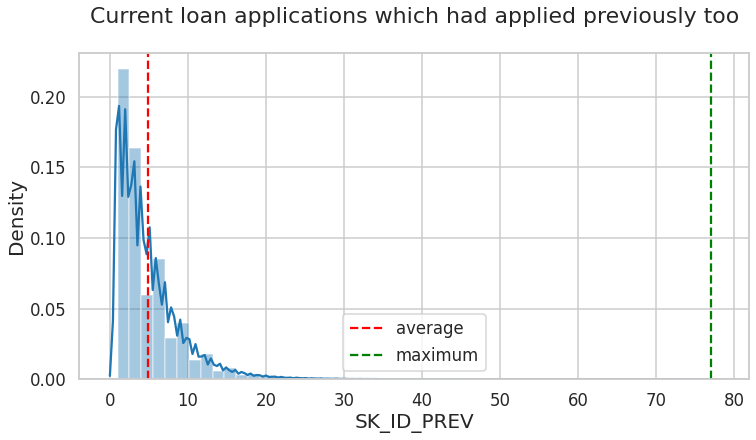

In [123]:
x = prev_data.groupby('SK_ID_CURR')['SK_ID_PREV'].count().reset_index()
plt.figure(figsize=(12,6))
ax = sns.distplot(x["SK_ID_PREV"])
plt.axvline(x["SK_ID_PREV"].mean(),linestyle="dashed",color="r",label="average")
plt.axvline(x["SK_ID_PREV"].max(),linestyle="dashed",color="g",label="maximum")
plt.legend(loc="best")
plt.title("Current loan applications which had applied previously too")
plt.show()

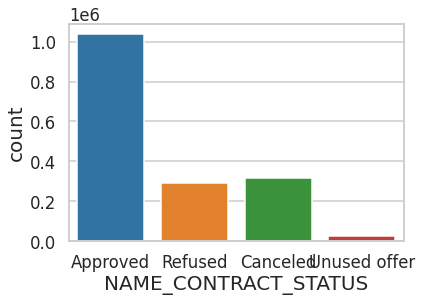

In [124]:
sns.countplot(data=prev_data, x='NAME_CONTRACT_STATUS')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


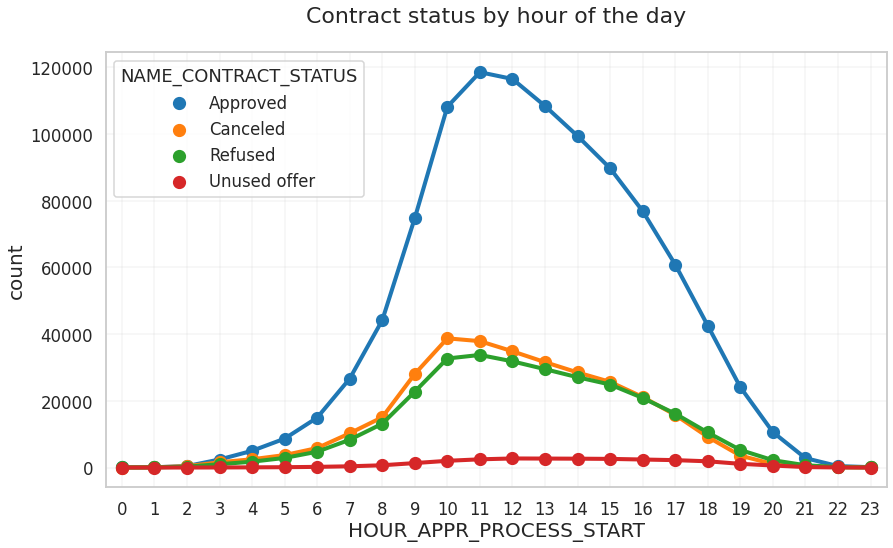

In [125]:
relation = pd.crosstab(prev_data["HOUR_APPR_PROCESS_START"],prev_data["NAME_CONTRACT_STATUS"]).stack().reset_index()
plt.figure(figsize=(14,8))
ax = sns.pointplot(relation["HOUR_APPR_PROCESS_START"],relation[0],hue=relation["NAME_CONTRACT_STATUS"],scale=1)
ax.set_ylabel("count")
ax.set_title("Contract status by hour of the day")
plt.grid(True,alpha=.2)

In [126]:
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

prev_data.shape

(69635, 37)

In [127]:
new_df=pd.merge(left=df_app,right=prev_data,how='inner',on='SK_ID_CURR',suffixes='_x')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  """Entry point for launching an IPython kernel.


In [128]:
new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [129]:
new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

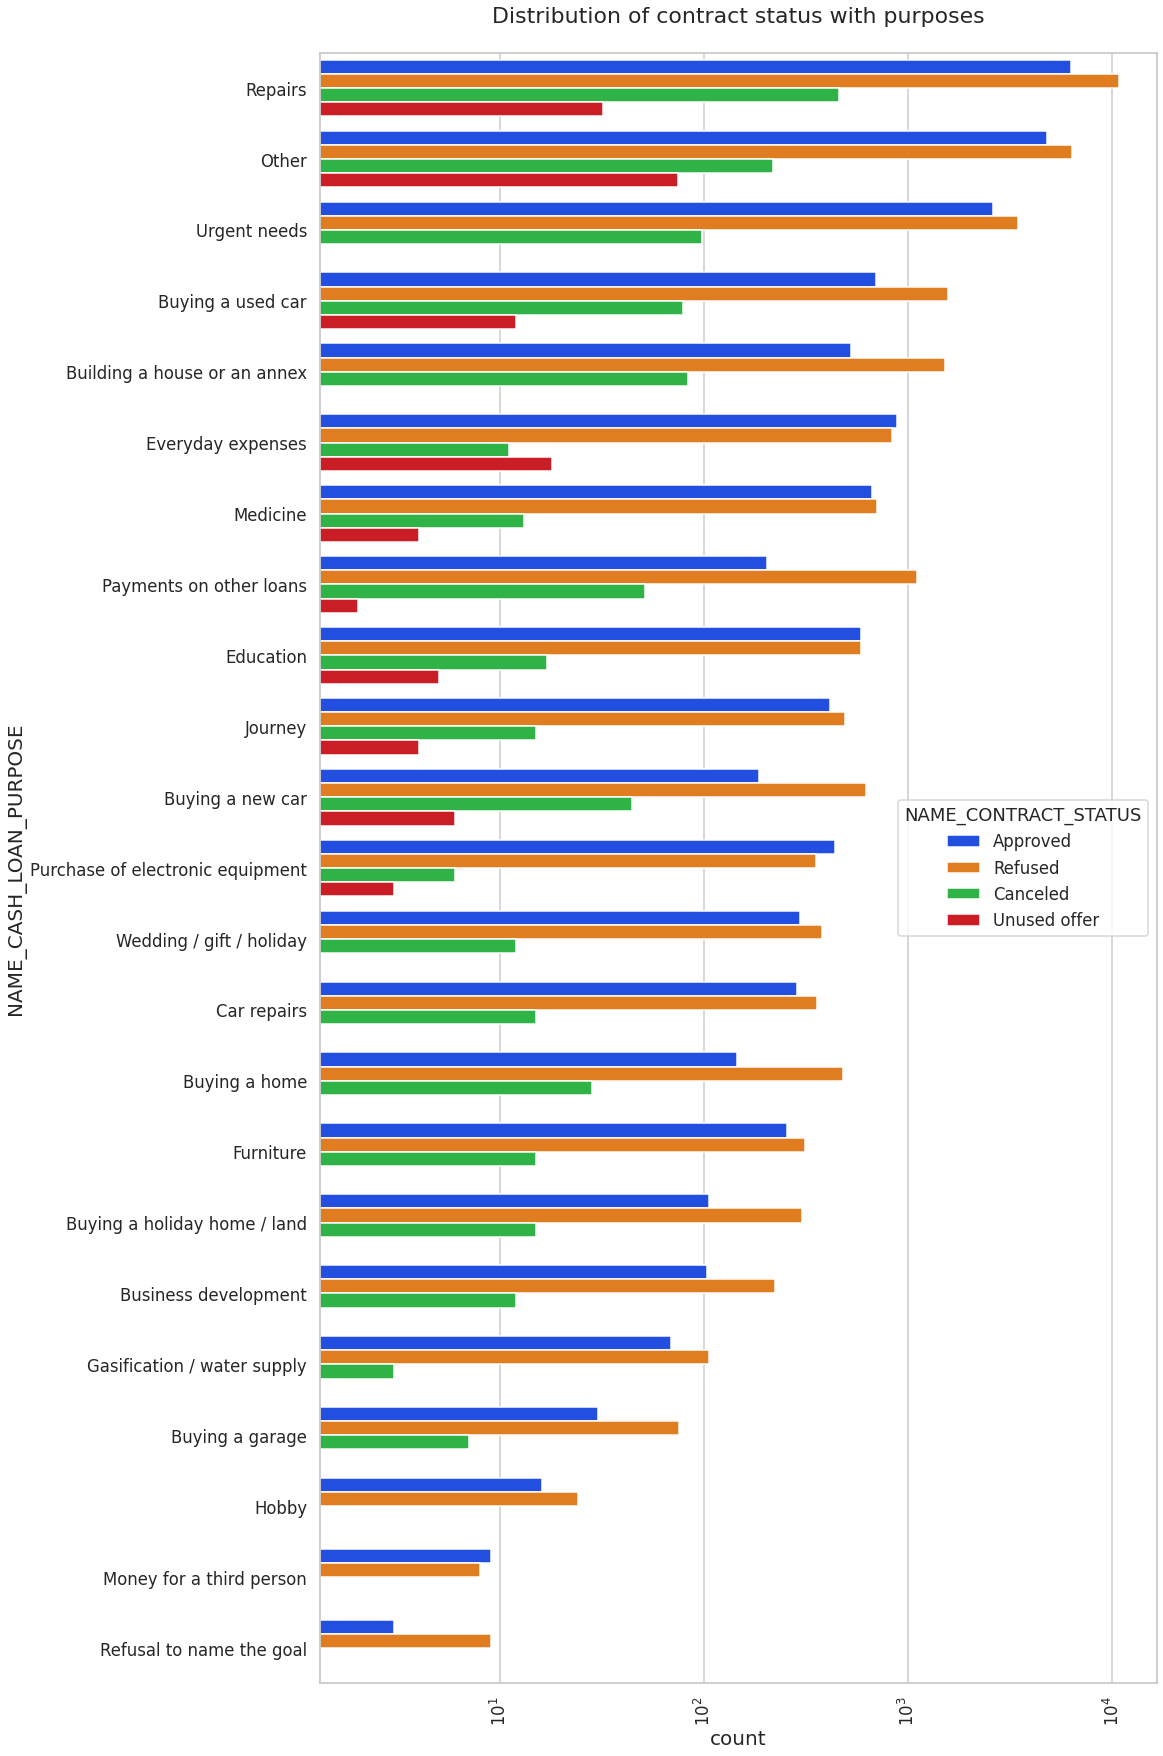

In [130]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='bright') 


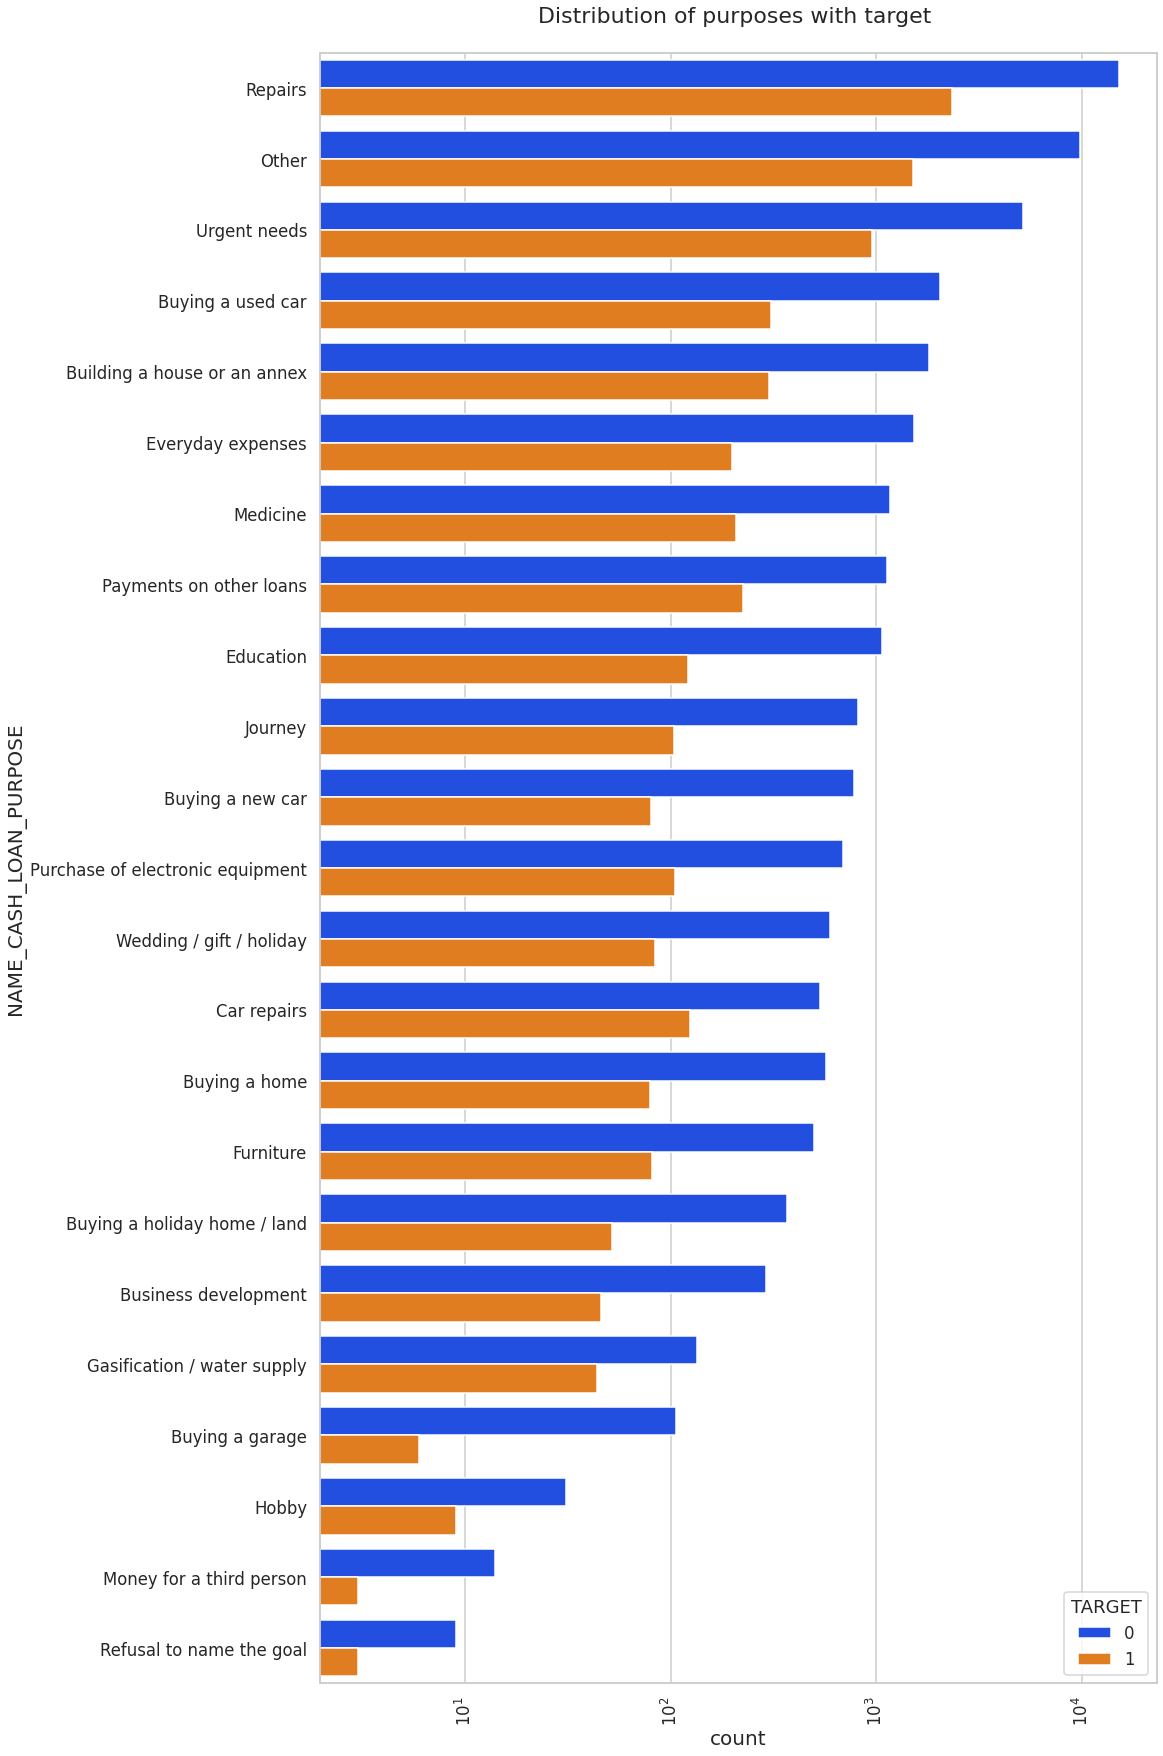

In [131]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='bright') 

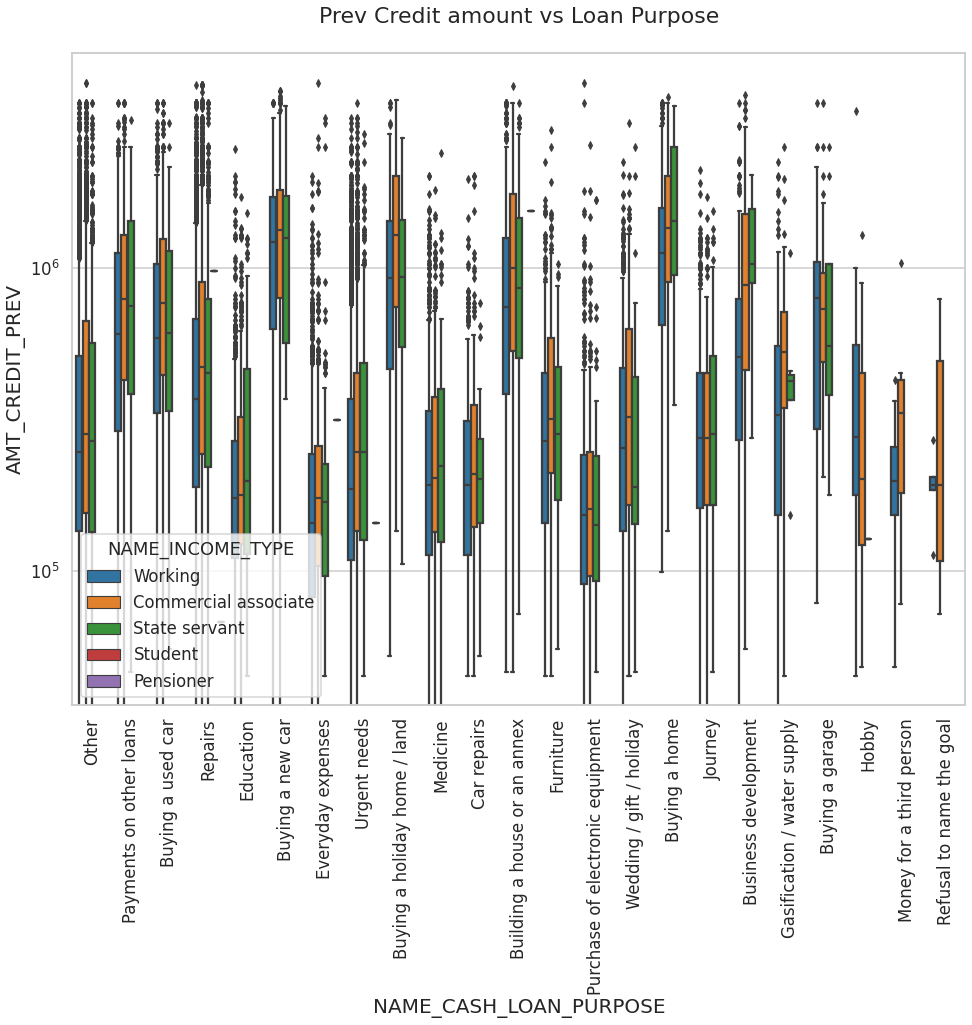

In [132]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

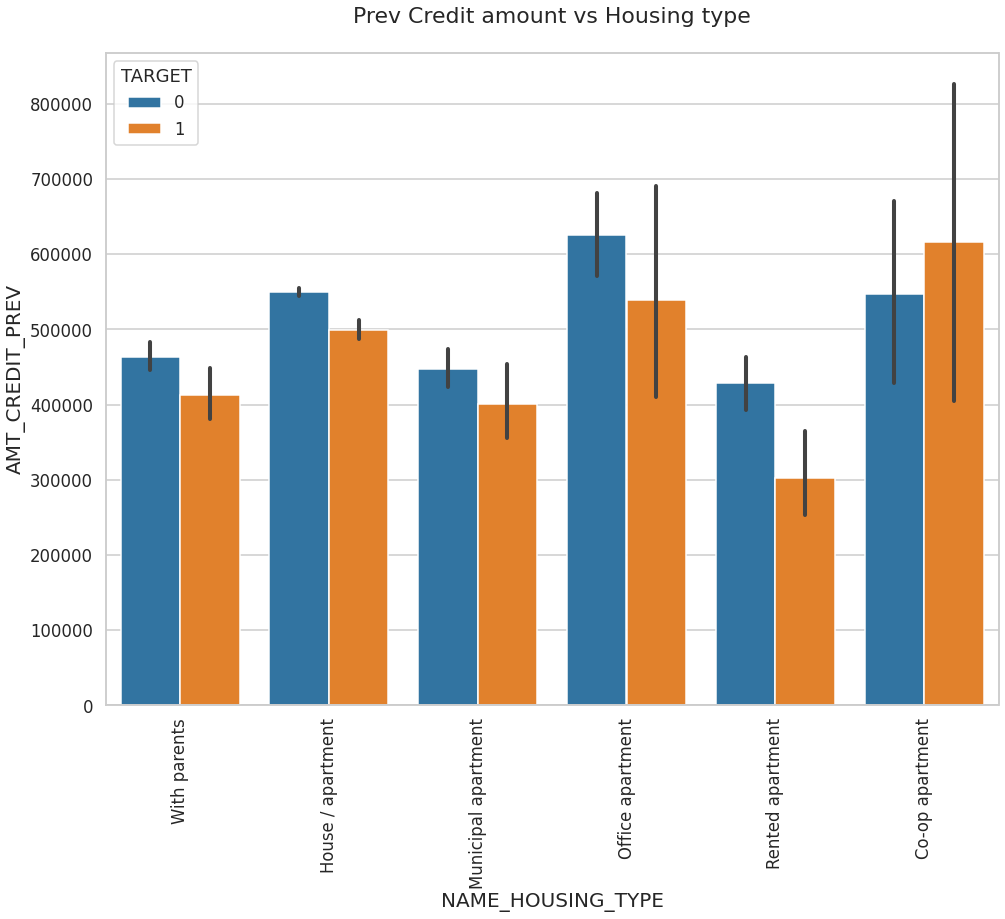

In [133]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

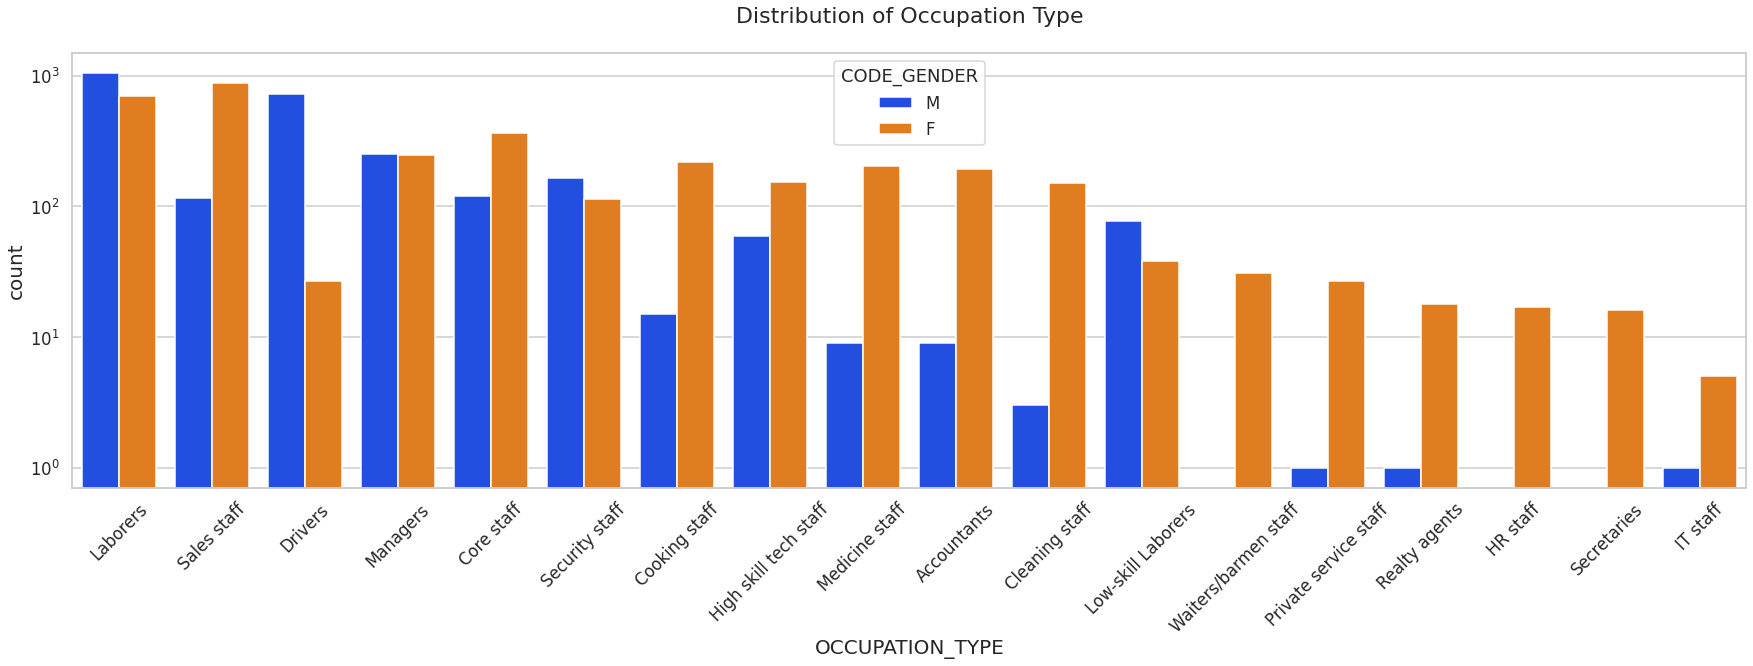

In [134]:
new_df1_target0=new_df1.loc[new_df1["TARGET"]==0]
new_df1_target1=new_df1.loc[new_df1["TARGET"]==1]
uniplot(new_df1_target1,col='OCCUPATION_TYPE',title='Distribution of Occupation Type',hue='CODE_GENDER')

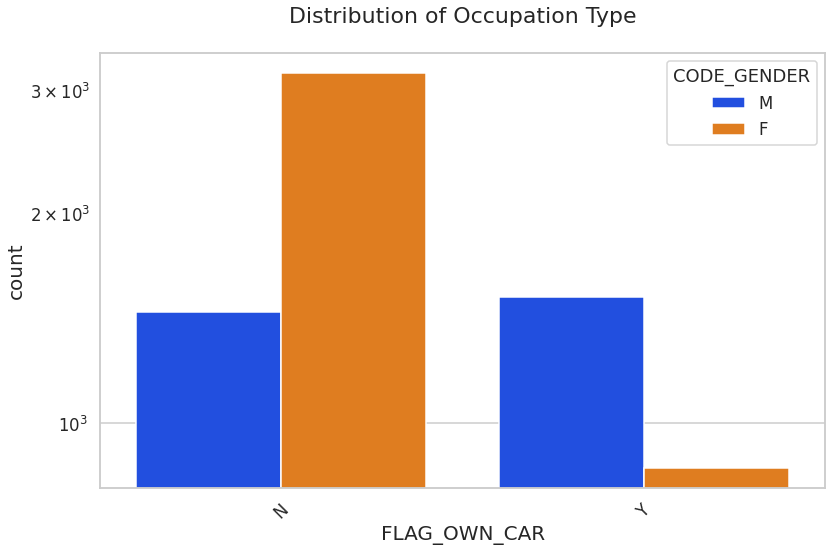

In [135]:
uniplot(new_df1_target1,col='FLAG_OWN_CAR',title='Distribution of Occupation Type',hue='CODE_GENDER')